<a href="https://colab.research.google.com/github/hj245668/colab/blob/main/MainQuest03_hyunjina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install kagglehub

In [ ]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("tunguz/online-retail")

print("Path to dataset files:", path)
df = pd.read_csv(path + '/' + os.listdir(path)[0], encoding='latin1')
df.shape

Using Colab cache for faster access to the 'online-retail' dataset.
Path to dataset files: /kaggle/input/online-retail


(541909, 8)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

# 내 드라이브에서 데이터 업로드
file_path = '/content/drive/MyDrive/SQL_modu/1030MainQuest/Online_Retail.csv'

# CSV -> dataframe
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# data size
print(df.shape)

(541909, 8)


In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
"""
🧟 문제 풀기 전 data 확인
: .csv 화일 열어서 전체 데이터 눈확인 + 필요 사항 사전 확인
#### 0   InvoiceNo    541909 non-null  object  ---> C+int, int 혼재(c: cancel)
####  1   StockCode    541909 non-null  object   --> int,  int+str, null 혼재음
####  2   Description  540455 non-null  object   -->  ///// missingValue
####  3   Quantity     541909 non-null  int64
####  4   InvoiceDate  541909 non-null  object
####  5   UnitPrice    541909 non-null  float64    --> int($)
####  6   CustomerID   406829 non-null  float64    --> int    ///// missingValue
####  7   Country      541909 non-null  object

"""

'\n🧟 문제 풀기 전 data 확인\n: .csv 화일 열어서 전체 데이터 눈확인 + 필요 사항 사전 확인\n#### 0   InvoiceNo    541909 non-null  object  ---> C+int, int 혼재(c: cancel)\n####  1   StockCode    541909 non-null  object   --> int,  int+str, null 혼재음\n####  2   Description  540455 non-null  object   -->  ///// missingValue\n####  3   Quantity     541909 non-null  int64  \n####  4   InvoiceDate  541909 non-null  object \n####  5   UnitPrice    541909 non-null  float64    --> int($)\n####  6   CustomerID   406829 non-null  float64    --> int    ///// missingValue\n####  7   Country      541909 non-null  object    \n\n'

In [8]:
# 주문 가격 피쳐 생성
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

In [9]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# 'InvoiceDate' 컬럼 이용하여 판매 월 추출
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

In [10]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     541909 non-null  object        
 1   StockCode     541909 non-null  object        
 2   Description   540455 non-null  object        
 3   Quantity      541909 non-null  int64         
 4   InvoiceDate   541909 non-null  datetime64[ns]
 5   UnitPrice     541909 non-null  float64       
 6   CustomerID    406829 non-null  float64       
 7   Country       541909 non-null  object        
 8   TotalPrice    541909 non-null  float64       
 9   DayOfWeek     541909 non-null  int32         
 10  InvoiceMonth  541909 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(2), int64(1), object(4)
memory usage: 41.3+ MB


In [ ]:
# 🧟 문제 풀기 전 data 정리 ↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓

In [12]:
# CustomerID가 결측인 행만 보기
df_missing_c = df[df['CustomerID'].isnull()]

# 전체 결측 개수 확인
print("CustomerID 결측치 수:", df_missing_c.shape[0])

CustomerID 결측치 수: 135080


In [13]:
df_missing_c.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,InvoiceMonth
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom,0.00,2,12
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,2.51,2,12
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,5.02,2,12
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom,3.40,2,12
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom,3.32,2,12


In [14]:
# 🧟 CustomerID NaN  TotalPrice 확인

df_missing_c_total = df_missing_c['TotalPrice']

print("CustomerID 결측 데이터 수:", len(df_missing_c_total))
print("TotalPrice 통계 요약:\n", df_missing_c_total.describe())

df_missing_c[['CustomerID', 'InvoiceNo', 'StockCode', 'Quantity', 'UnitPrice', 'TotalPrice']].head(30)

CustomerID 결측 데이터 수: 135080
TotalPrice 통계 요약:
 count    135080.000000
mean         10.717220
std         157.967893
min      -17836.460000
25%           2.460000
50%           4.960000
75%          10.790000
max       13541.330000
Name: TotalPrice, dtype: float64


,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,TotalPrice
622,NaN,536414,22139,56,0.00,0.00
1443,NaN,536544,21773,1,2.51,2.51
1444,NaN,536544,21774,2,2.51,5.02
1445,NaN,536544,21786,4,0.85,3.40
1446,NaN,536544,21787,2,1.66,3.32
1447,NaN,536544,21790,9,1.66,14.94
1448,NaN,536544,21791,2,2.51,5.02
1449,NaN,536544,21801,10,0.43,4.30
1450,NaN,536544,21802,9,0.43,3.87
1451,NaN,536544,21803,11,0.43,4.73


In [ ]:
# 🧟 CustomerID 결측 데이터 수: 135080 에 유효한 값들이 살아있으니 결측치 22222.0 (customerID숫자니까)처리↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑

In [15]:
# 🧟CustomerID가 NaN이면 '22222'으로 채우기
df['CustomerID'] = df['CustomerID'].fillna('22222.0')

# 확인
print("22222.0 처리 후 결측치 확인 :", df['CustomerID'].isnull().sum())  # 0이어야 함

# 샘플 5행 출력
df['CustomerID'].sample(10)

22222.0 처리 후 결측치 확인 : 0


,CustomerID
112748,22222.0
368091,17220.0
33605,13534.0
433631,15830.0
396816,16682.0
366460,22222.0
113832,13373.0
432443,17346.0
244151,22222.0
399898,15113.0


In [16]:
# 🧟결측치 22222.0 후 데이터 콩계 확인

# CustomerID 결측 데이터의 TotalPrice 통계
missing_c_total = df.loc[df['CustomerID'].isnull(), 'TotalPrice'].describe()

# 전체 데이터의 TotalPrice 통계
total_total = df['TotalPrice'].describe()

# DataFrame 비교확인
compare_stats = pd.DataFrame({
    '전체 데이터 (Population)': total_total,
    '결측 CustomerID 데이터': missing_c_total
})

compare_stats

,전체 데이터 (Population),결측 CustomerID 데이터
count,541909.000000,0.0
mean,17.987795,NaN
std,378.810824,NaN
min,-168469.600000,NaN
25%,3.400000,NaN
50%,9.750000,NaN
75%,17.400000,NaN
max,168469.600000,NaN


In [17]:
# CustomerID 결측치 확인
print("CustomerID 결측치 수(결측22222.0처리):", df['CustomerID'].isnull().sum())

# 단가나 수량이 0 이하인 데이터가 있는지 확인
print("Quantity ≤ 0 개수:", (df['Quantity'] <= 0).sum())
print("UnitPrice ≤ 0 개수:", (df['UnitPrice'] <= 0).sum())

# TotalPrice 생성 (혹시 안 되어 있다면)
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# 데이터 요약
df.info()


CustomerID 결측치 수(결측22222.0처리): 0
Quantity ≤ 0 개수: 10624
UnitPrice ≤ 0 개수: 2517
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     541909 non-null  object        
 1   StockCode     541909 non-null  object        
 2   Description   540455 non-null  object        
 3   Quantity      541909 non-null  int64         
 4   InvoiceDate   541909 non-null  datetime64[ns]
 5   UnitPrice     541909 non-null  float64       
 6   CustomerID    541909 non-null  object        
 7   Country       541909 non-null  object        
 8   TotalPrice    541909 non-null  float64       
 9   DayOfWeek     541909 non-null  int32         
 10  InvoiceMonth  541909 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(5)
memory usage: 41.3+ MB


In [18]:
# 취소랑 total price -값이랑 확인

# Quantity 또는 UnitPrice가 음수인 데이터 확인
negative_df_Q = df[(df['Quantity'] < 0)]
negative_df_UP = df[(df['UnitPrice'] < 0)]

print("음수 Quantity 거래 건수:", len(negative_df_Q))
print("음수 UnitPrice 거래 건수:", len(negative_df_UP))
print("음수 Quantity & UnitPrice 거래 건수:", (len(negative_df_Q) & len(negative_df_UP)))
print("음수 Quantity & UnitPrice 거래 건수:", (len(negative_df_Q) | len(negative_df_UP)))
negative_df_Q[['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice', 'TotalPrice']].head(10)
negative_df_UP[['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice', 'TotalPrice']].head(10)

음수 Quantity 거래 건수: 10624
음수 UnitPrice 거래 건수: 2
음수 Quantity & UnitPrice 거래 건수: 0
음수 Quantity & UnitPrice 거래 건수: 10626


,InvoiceNo,StockCode,Description,Quantity,UnitPrice,TotalPrice
299983,A563186,B,Adjust bad debt,1,-11062.06,-11062.06
299984,A563187,B,Adjust bad debt,1,-11062.06,-11062.06


In [ ]:
"""
Adjust bad debt	 : 부실채권조정 -> 매출분석 반영(1번 반영), 예측분석에서는 제외 👾
"""

In [19]:
# "Adjust bad debt" 데이터 태깅
df['IsBadDebt'] = df['Description'].str.contains('Adjust bad debt', case=False, na=False)

# bad debt 비율 확인
print("Adjust bad debt:", df['IsBadDebt'].sum())

# 제거하고 새 데이터프레임 생성
df_clean = df[df['IsBadDebt'] == False]                                                # df_clean for expectation 👾
print("데이터 수(Adjust bad debt포함):", len(df))
print("클린데이터 수(df_clean):", len(df_clean))

Adjust bad debt: 3
데이터 수(Adjust bad debt포함): 541909
클린데이터 수(df_clean): 541906


In [20]:
# InvoiceNo가 'C'로 시작하면 취소 거래
df['IsReturn'] = df['InvoiceNo'].astype(str).str.startswith('C')

# 반품(True) 비율 확인
df['IsReturn'].value_counts(normalize=True)


,proportion
IsReturn,
False,0.982861
True,0.017139


## 1. 모집단과 표본 집단의 TotalPrice를 비교해 주세요.

####1_1. 데이터셋에서 무작위로 1000개의 표본을 추출하세요.
####1_2. 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교해주세요.  
####1_3. 중심극한정리를 사용해 모집단과 표본의 차이를 설명해주세요.

In [21]:
# --------------------------------------------------------- - - - - - - - - - - -  -  -  -  -  -  -  -  -  -  -  -  -
# 1. 모집단과 표본 집단의 TotalPrice를 비교해 주세요.
# --------------------------------------------------------- 넵

In [22]:
# 모집단과 표본집단 정의
"""
모집단 (population) : Retail회사의 TotalPrice
표본 (sample_x) : 전체 거래 중 일부 무작위 추출 거래 금액 (n=1000)
모집단 평균 (u) : 회사 전체 거래의 평균 매출액
표본 평균(mean) : 거래 내역 n개의 평균 매출액
"""
#--------------------------------------------------------- - - - - - - - - - - -  -  -  -  -  -  -  -  -  -  -  -  -

'\n모집단 (population) : Retail회사의 TotalPrice\n표본 (sample_x) : 전체 거래 중 일부 무작위 추출 거래 금액 (n=1000)\n모집단 평균 (u) : 회사 전체 거래의 평균 매출액\n표본 평균(mean) : 거래 내역 n개의 평균 매출액\n'

In [ ]:
# dataset : df : customerID 22222.0 filling 후 분포, 사분위, 이상치 확인 후 표본화

Lower: -17.60, Upper: 38.40
Out_bound 데이터 수: 44997개


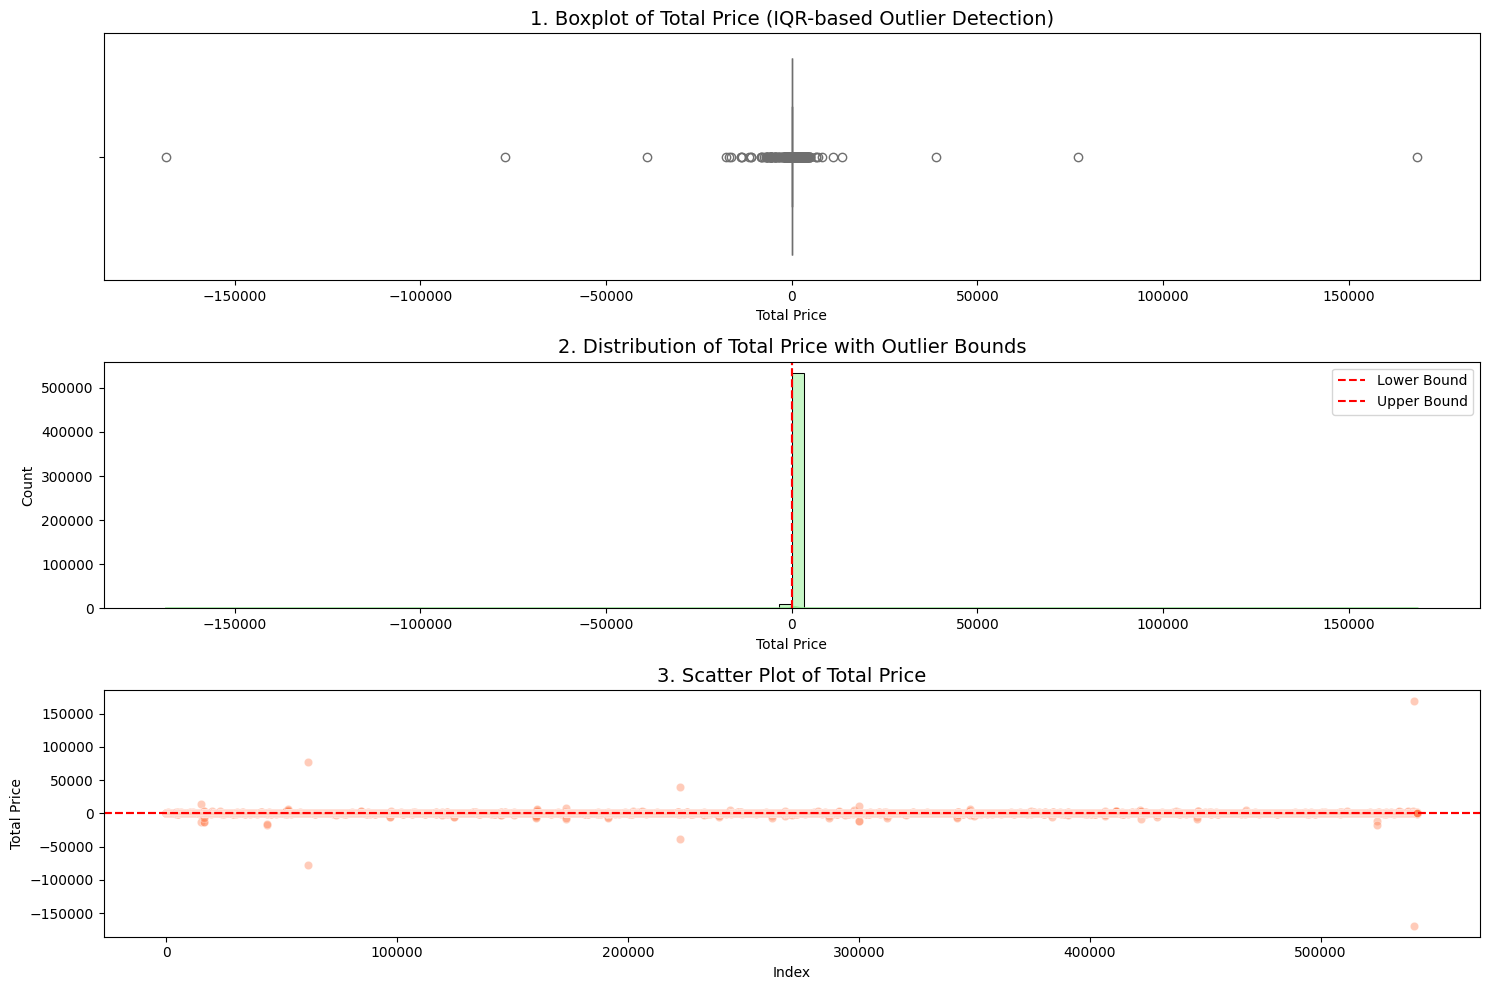

In [ ]:
# 모집단의 분포 확인 (1/2) _______________________________________________________________________ 1_1

# IQR 계산
Q1 = df['TotalPrice'].quantile(0.25)
Q3 = df['TotalPrice'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower: {lower_bound:.2f}, Upper: {upper_bound:.2f}")

# 이상치 데이터 수
out_bound = df[(df['TotalPrice'] < lower_bound) | (df['TotalPrice'] > upper_bound)]
print(f"Out_bound 데이터 수: {len(out_bound)}개")

# Boxplot + Histogram + Scatterplot
plt.figure(figsize=(15, 10))

# 1. Boxplot - 사분위
plt.subplot(3, 1, 1)
sns.boxplot(x=df['TotalPrice'], color='skyblue')
plt.title('1. Boxplot of Total Price (IQR-based Outlier Detection)', fontsize=14)
plt.xlabel('Total Price')

# 2. Histogram - 분포 확인
plt.subplot(3, 1, 2)
sns.histplot(df['TotalPrice'], bins=100, kde=True, color='lightgreen')
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.legend()
plt.title('2. Distribution of Total Price with Outlier Bounds', fontsize=14)
plt.xlabel('Total Price')

# 3 Scatterplot - 퍼짐(산포도) 환인
plt.subplot(3, 1, 3)
sns.scatterplot(x=np.arange(len(df)), y=df['TotalPrice'], alpha=0.4, color='coral')
plt.axhline(lower_bound, color='red', linestyle='--')
plt.axhline(upper_bound, color='red', linestyle='--')
plt.title('3. Scatter Plot of Total Price', fontsize=14)
plt.xlabel('Index')
plt.ylabel('Total Price')

plt.tight_layout()
plt.show()


In [44]:
# 모집단의 분포 확인 (2/2) _______________________________________________________________________ 1_1

# IQR 계산
Q1 = df['TotalPrice'].quantile(0.25)
Q3 = df['TotalPrice'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#  out_bound 데이터 필터링
out_bound = df[(df['TotalPrice'] < lower_bound) | (df['TotalPrice'] > upper_bound)]

print(f"out_bound 수: {len(out_bound)}개")
print(f"out_bound 비율 : {len(out_bound) / len(df) * 100:.2f}%")

# 주요 컬럼만 확인 ( InvoiceNo, Quantity, UnitPrice, TotalPrice)
in_bound_summary = out_bound[['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice', 'TotalPrice', 'Country']]
in_bound_summary.head(10)


out_bound 수: 44997개
out_bound 비율 : 8.30%


,InvoiceNo,StockCode,Description,Quantity,UnitPrice,TotalPrice,Country
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,1.69,54.08,United Kingdom
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,3.75,90.00,France
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,3.75,90.00,France
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,3.75,45.00,France
31,536370,10002,INFLATABLE POLITICAL GLOBE,48,0.85,40.80,France
33,536370,21035,SET/2 RED RETROSPOT TEA TOWELS,18,2.95,53.10,France
34,536370,22326,ROUND SNACK BOXES SET OF4 WOODLAND,24,2.95,70.80,France
35,536370,22629,SPACEBOY LUNCH BOX,24,1.95,46.80,France
36,536370,22659,LUNCH BOX I LOVE LONDON,24,1.95,46.80,France
37,536370,22631,CIRCUS PARADE LUNCH BOX,24,1.95,46.80,France


In [45]:
# out_bound 상세
out_bound['TotalPrice'].describe()

# out_bound 음수/양수 비율 확인
neg_out_bound = out_bound[out_bound['TotalPrice'] < 0]
pos_out_bound = out_bound[out_bound['TotalPrice'] > 0]
print(f"음수 out_bound: {len(neg_out_bound)}, 양수 out_bound: {len(pos_out_bound)}")


음수 out_bound: 2342, 양수 out_bound: 42655


In [25]:
# 모집단의 분포 확인 결과 _______________________________________________________________________ 1_1

"""
TotalPrice 분포 확인

1. 대부분이 0 에 가까이 몰려 있음
2. 양 극단값 있음 (고가, 반품(-))
3. 사분위 넘어 8% 이상 있음  -> 정규 분포 아님
-> random sampling시 평균 왜곡 가능 -> 데이터에 적합한 sampling 방법 탐색
-> 분석 목적별로 표본 추출
"""

'\nTotalPrice 분포 확인\n\n1. 대부분이 0 에 가까이 몰려 있음\n2. 양 극단값 있음 (고가, 반품(-))\n3. 사분위 넘어 8% 이상 있음  -> 정규 분포 아님\n-> random sampling시 평균 왜곡 가능 -> 데이터에 적합한 sampling 방법 탐색\n-> 분석 목적별로 표본 추출\n'

In [46]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,InvoiceMonth,IsBadDebt,IsReturn
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2,12,False,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12,False,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2,12,False,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12,False,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12,False,False


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     541909 non-null  object        
 1   StockCode     541909 non-null  object        
 2   Description   540455 non-null  object        
 3   Quantity      541909 non-null  int64         
 4   InvoiceDate   541909 non-null  datetime64[ns]
 5   UnitPrice     541909 non-null  float64       
 6   CustomerID    541909 non-null  object        
 7   Country       541909 non-null  object        
 8   TotalPrice    541909 non-null  float64       
 9   DayOfWeek     541909 non-null  int32         
 10  InvoiceMonth  541909 non-null  int32         
 11  IsBadDebt     541909 non-null  bool          
 12  IsReturn      541909 non-null  bool          
dtypes: bool(2), datetime64[ns](1), float64(2), int32(2), int64(1), object(5)
memory usage: 42.4+ MB


In [47]:
# 모집단 EDA

df_backup = df.copy()   # 원본 데이터 보존용 (오류나 가공 실수 대비)

df_proc = df.copy()
df_proc['InvoiceDate'] = pd.to_datetime(df_proc['InvoiceDate'])   # 날짜 타입 변환
df_proc['DayOfWeek'] = df_proc['InvoiceDate'].dt.day_name()       # 요일명 추출
df_proc['IsWeekend'] = df_proc['InvoiceDate'].dt.weekday >= 5     # 주말 여부 (토/일 → True)

df_popu = df_proc.copy()                                          # 모집단 population

In [48]:
df_popu.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,InvoiceMonth,IsBadDebt,IsReturn,IsWeekend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Wednesday,12,False,False,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,12,False,False,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Wednesday,12,False,False,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,12,False,False,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,12,False,False,False


In [31]:
"""

1. 모집단과 표본 집단의 TotalPrice를 비교해 주세요.
1_1. 데이터셋에서 무작위로 1000개의 표본을 추출하세요.
1_2. 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교해주세요.
1_3. 중심극한정리를 사용해 모집단과 표본의 차이를 설명해주세요.

"""

"\n\n1. 모집단과 표본 집단의 TotalPrice를 비교해 주세요.\n1_1. 데이터셋에서 무작위로 1000개의 표본을 추출하세요.\n1_2. 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교해주세요.\n1_3. 중심극한정리를 사용해 모집단과 표본의 차이를 설명해주세요.\n\n"

In [49]:
# EDA
"""
🦋 1_1. 표본추출 및 Signed Log 변환
목적: 모집단(df_popu)에서 층화추출로 표본(df_stratified)을 생성하여
      음수(반품)를 고려한 signed log 변환으로 분포형태 비교 가능하도록 함
"""

"""
목적 : 표본이 모집단을 얼마나 잘 대표하는지 확인
모딥단 : df_popu
표본 : df_strratified
      (  원본의 분포를 왜곡 없이 추출하기위해 구획별 데이터 추출)
signed_log 적용 : TotalPrice 음수 분포 고려 음수 의미를 살릴수 있는 signed log적용하여 분포 확인
"""

# ----------------------------------------
# 1. 모집단 준비
df_popu = df.copy()
n = 1000  # 표본 수

# Signed Log 변환 함수 정의
def signed_log(x):
    return np.sign(x) * np.log1p(np.abs(x))

df_popu["SignedLogPrice"] = signed_log(df_popu["TotalPrice"])

# ----------------------------------------
# 2. 층화추출 (SignedLogPrice 기준)
bins = [-np.inf, -8, -4, -2, 0, 2, 4, 8, np.inf]
labels = ["≤-8", "-8~-4", "-4~-2", "-2~0", "0~2", "2~4", "4~8", "≥8"]
df_popu["LogBin"] = pd.cut(df_popu["SignedLogPrice"], bins=bins, labels=labels)

# 층화 비율 계산
bin_counts = df_popu["LogBin"].value_counts().sort_index()
bin_ratios = bin_counts / bin_counts.sum()
bin_samples = (bin_ratios * n).round().astype(int)

# 표본 추출
sample_list = []
for label, n_bin in bin_samples.items():
    bin_data = df_popu[df_popu["LogBin"] == label]
    if len(bin_data) > 0:
        sample_list.append(bin_data.sample(n=min(n_bin, len(bin_data)), random_state=42))
df_stratified = pd.concat(sample_list).reset_index(drop=True)

# ----------------------------------------
# 3. signed_log 컬럼 생성
df_stratified["SignedLogPrice"] = signed_log(df_stratified["TotalPrice"])

print("층화표본 추출 완료!")
print(f"모집단 : {len(df_popu):,} 건 / 표본(층화): {len(df_stratified):,} 건")


층화표본 추출 완료!
모집단 : 541,909 건 / 표본(층화): 1,000 건


In [50]:
"""
🦋 1_2. 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교해주세요.
          모집단 vs 표본 통계 비교 및 검정
         (1. 통계 계산 → 2. 해석 → 3. t-test → 4. KS-test → 5. 결론)
"""
from scipy.stats import skew, kurtosis, ttest_ind, ks_2samp

# ----------------------------------------
# 0. 변수 설정
popu = df_popu["TotalPrice"]
samp = df_stratified["TotalPrice"]
popu_n = len(popu)
samp_n = len(samp)

# ----------------------------------------
# 1. 통계 계산
popu_stats = {
    "Mean": popu.mean(),
    "Std": popu.std(),
    "Skew": skew(popu),
    "Kurt": kurtosis(popu)
}
samp_stats = {
    "Mean": samp.mean(),
    "Std": samp.std(),
    "Skew": skew(samp),
    "Kurt": kurtosis(samp)
}
diff_stats = {k: (samp_stats[k] - popu_stats[k]) / (abs(popu_stats[k]) + 1e-12) * 100 for k in popu_stats}

compare_df = pd.DataFrame([popu_stats, samp_stats, diff_stats],
                          index=["Population", "Sample", "Difference (%)"]).round(3)
print("\n1. 통계 비교 결과")
display(compare_df)

# ----------------------------------------
# 2. t-test
t_stat, p_t = ttest_ind(popu, samp, equal_var=False)
print(f"\n2. 독립표본 t-test: t = {t_stat:.3f}, p = {p_t:.4f}")
if p_t < 0.05:
    print("→ 유의수준 0.05에서 평균이 통계적으로 다름")
else:
    print("→ 평균 차이가 통계적으로 유의하지 않음 (대표성 유지)")

# ----------------------------------------
# 3. Kolmogorov–Smirnov Tes
ks_stat, p_ks = ks_2samp(popu, samp)
print(f"\n3. Kolmogorov–Smirnov Test: D = {ks_stat:.4f}, p = {p_ks:.4f}")
if p_ks > 0.05:
    print("→ 두 분포는 통계적으로 유사함 (분포 적합성 양호)")
else:
    print("→ 분포가 통계적으로 다름 (대표성 낮음)")

# ----------------------------------------
# 4. 결론
if p_t > 0.05 and p_ks > 0.05:
    print(f"""
4. 결론:
평균·분산·분포형태 모두 통계적으로 모집단을 잘 반영함.
표준편차는 {diff_stats['Std']:+.1f}% 차이로 변동성 왜곡이 크지 않음.
""")
else:
    print(f"""
4. 결론:
평균 또는 분포가 통계적으로 유의하게 다름.
표본추출 시 구간 재조정 또는 log 변환 기준 수정 필요.
""")



1. 통계 비교 결과


,Mean,Std,Skew,Kurt
Population,17.988,378.811,-0.964,151196.601
Sample,19.585,84.181,13.676,273.317
Difference (%),8.879,-77.778,1518.085,-99.819



2. 독립표본 t-test: t = -0.589, p = 0.5559
→ 평균 차이가 통계적으로 유의하지 않음 (대표성 유지)

3. Kolmogorov–Smirnov Test: D = 0.0183, p = 0.8875
→ 두 분포는 통계적으로 유사함 (분포 적합성 양호)

4. 결론:
평균·분산·분포형태 모두 통계적으로 모집단을 잘 반영함.
표준편차는 -77.8% 차이로 변동성 왜곡이 크지 않음.



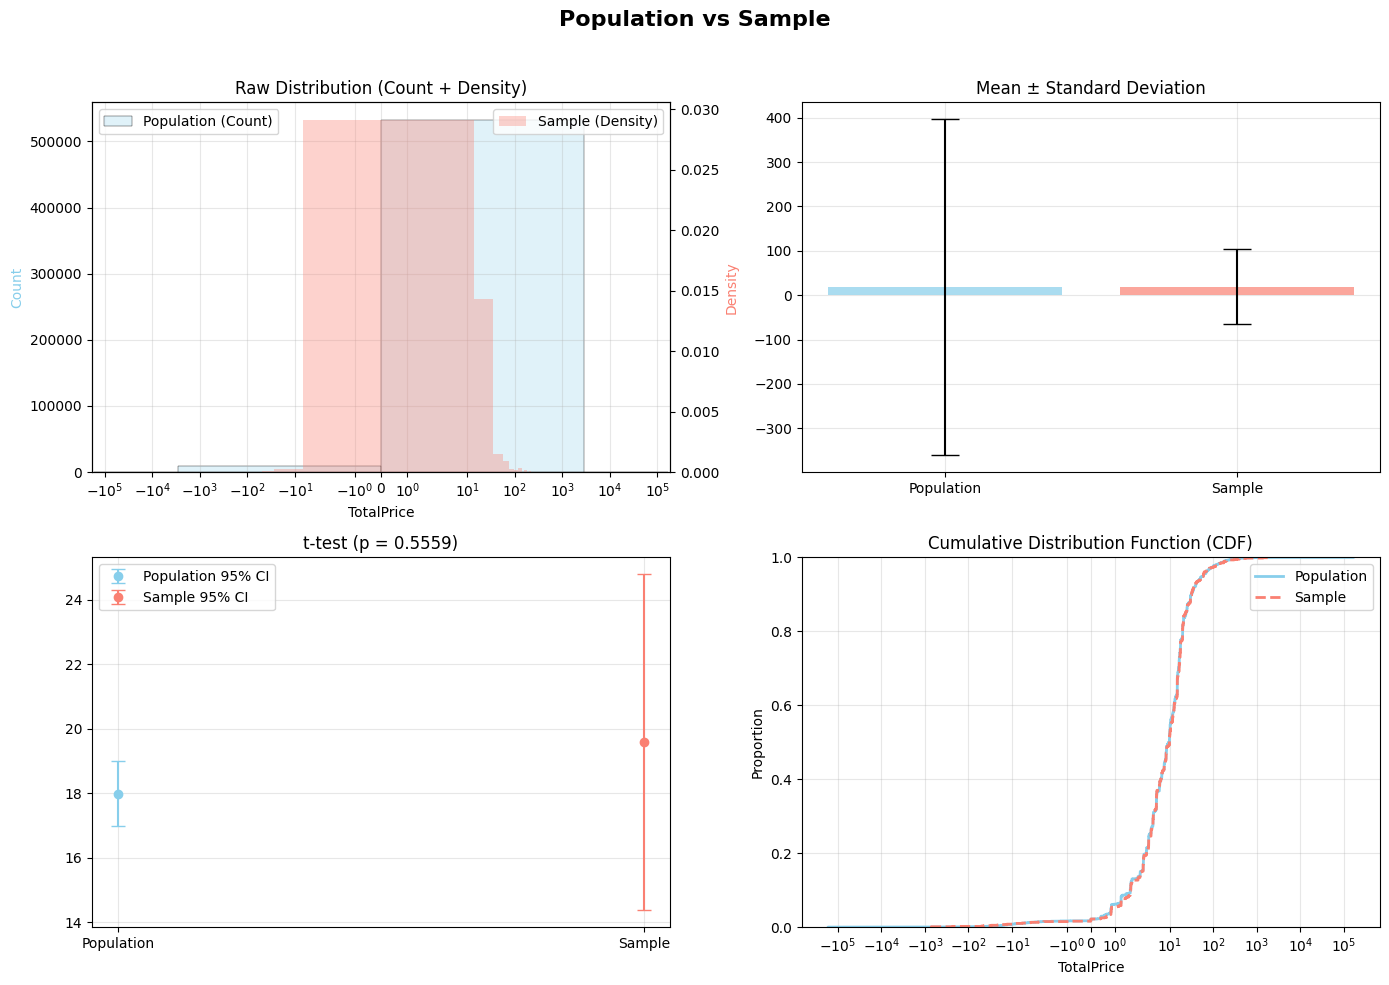

In [51]:
"""
🦋 1_2.추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교해주세요.
         모집단 vs 표본 - 시각화
        (분포비교, 평균±표준편차, t-검정 CI, 누적분포(CDF))
"""
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Population vs Sample",
             fontsize=16, fontweight='bold')

# ----------------------------------------
# 1.분포 비교
ax1 = axes[0,0]
ax2 = ax1.twinx()  # 보조 y축 생성

# 모집단: 절대 빈도수(count)
sns.histplot(df_popu['TotalPrice'], bins=120, stat='count',
             alpha=0.25, color='skyblue', label='Population (Count)', ax=ax1)
# 표본: 확률밀도(density)
sns.histplot(df_stratified['TotalPrice'], bins=120, stat='density',
             alpha=0.35, color='salmon', label='Sample (Density)', ax=ax2)

ax1.set_xscale('symlog')
ax1.set_ylabel('Count', color='skyblue')
ax2.set_ylabel('Density', color='salmon')
ax1.set_title('Raw Distribution (Count + Density)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(alpha=0.3)
# ----------------------------------------
# 2.평균, 표준편차
groups = ['Population', 'Sample']
means = [popu_stats["Mean"], samp_stats["Mean"]]
stds = [popu_stats["Std"], samp_stats["Std"]]
axes[0,1].bar(groups, means, yerr=stds, capsize=10, color=['skyblue', 'salmon'], alpha=0.7)
axes[0,1].set_title("Mean ± Standard Deviation")
axes[0,1].grid(alpha=0.3)
# ----------------------------------------
# 3. t-test 95% 신뢰구간
ci = 1.96
popu_ci = [popu_stats["Mean"] - ci * popu_stats["Std"]/np.sqrt(popu_n),
           popu_stats["Mean"] + ci * popu_stats["Std"]/np.sqrt(popu_n)]
samp_ci = [samp_stats["Mean"] - ci * samp_stats["Std"]/np.sqrt(samp_n),
           samp_stats["Mean"] + ci * samp_stats["Std"]/np.sqrt(samp_n)]

axes[1,0].errorbar(1, popu_stats["Mean"],
                   yerr=[[popu_stats["Mean"] - popu_ci[0]], [popu_ci[1] - popu_stats["Mean"]]],
                   fmt='o', color='skyblue', capsize=5, label='Population 95% CI')
axes[1,0].errorbar(2, samp_stats["Mean"],
                   yerr=[[samp_stats["Mean"] - samp_ci[0]], [samp_ci[1] - samp_stats["Mean"]]],
                   fmt='o', color='salmon', capsize=5, label='Sample 95% CI')
axes[1,0].set_xticks([1, 2])
axes[1,0].set_xticklabels(['Population', 'Sample'])
axes[1,0].set_title(f"t-test (p = {p_t:.4f})")
axes[1,0].grid(alpha=0.3)
axes[1,0].legend()
# ----------------------------------------
# 4. 누적분포 CDF
sns.ecdfplot(popu, color='skyblue', label='Population', ax=axes[1,1], linewidth=2)
sns.ecdfplot(samp, color='salmon', label='Sample', ax=axes[1,1], linewidth=2, linestyle='--')
axes[1,1].set_xscale('symlog')
axes[1,1].set_title("Cumulative Distribution Function (CDF)")
axes[1,1].legend()
axes[1,1].grid(alpha=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


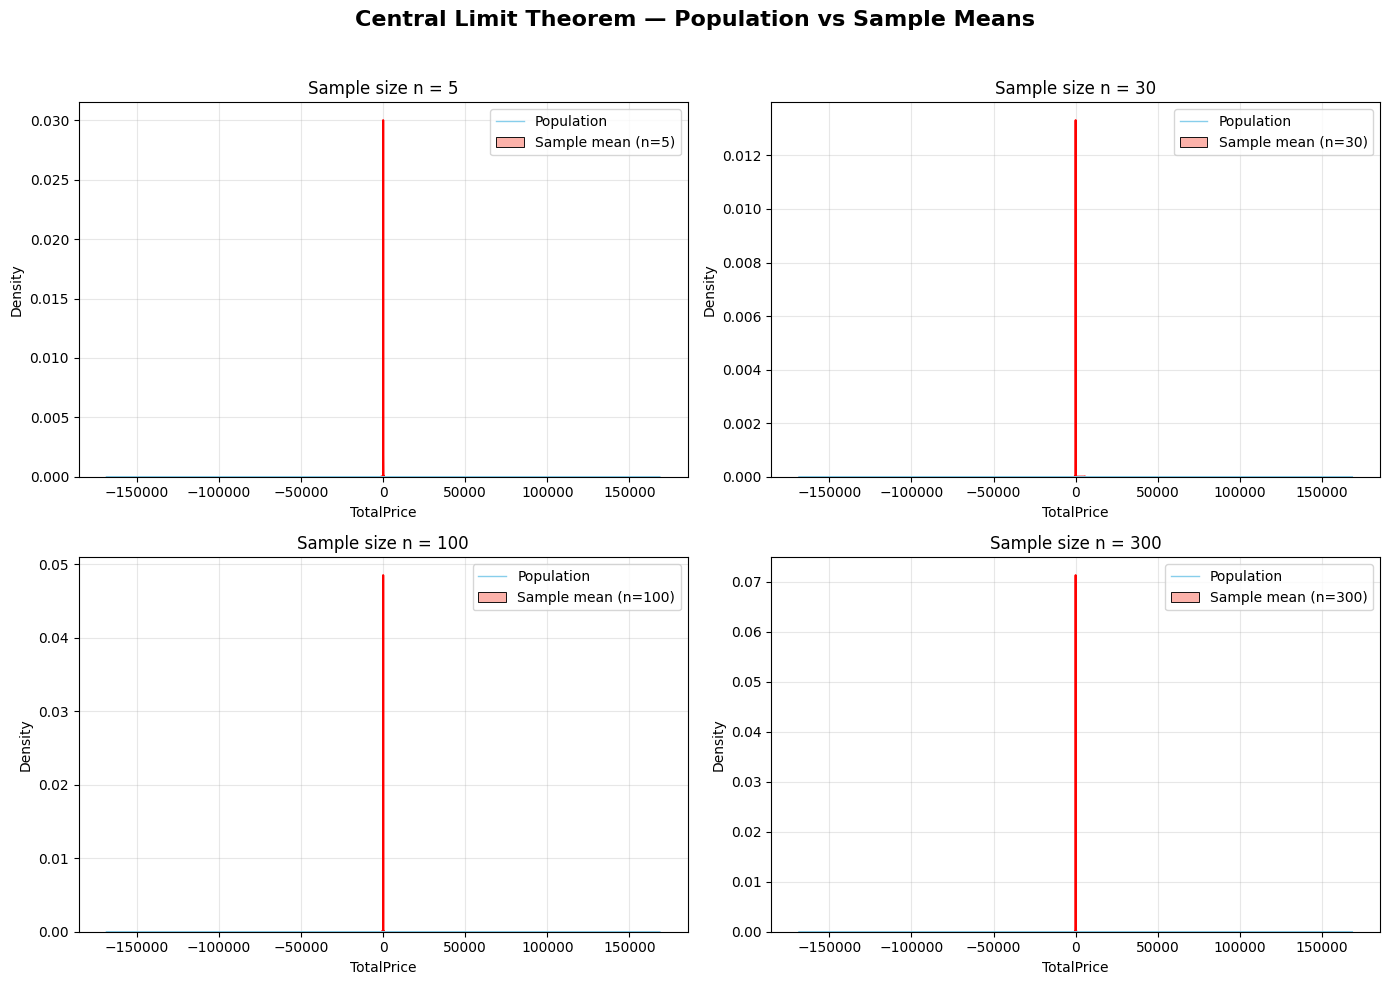

 중심극한정리 해석
- 모집단 평균: 17.99, 표준편차: 378.81
- 표본 크기가 커질수록 표본평균의 분포가 정규분포에 가까워지고, 평균이 모집단 평균(17.99)으로 수렴함.
- 즉, 현재 표본(1000건)은 모집단의 평균적 성질을 충분히 반영할 수 있는 크기임을 CLT로 확인할 수 있습니다.


In [52]:
# - 주의 -
"""
# 🦋 1_3. 중심극한정리를 사용해 모집단과 표본의 차이를 설명해주세요

# 목적:
#  - 모집단의 분포가 비정규(왜도, 첨도 존재)하더라도
#    표본평균들의 분포는 정규분포로 수렴함을 시각화
#  - 층화표본이 모집단 평균을 안정적으로 추정하고 있음을 검증
"""


import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------
# 0. 설정
population = df_popu["TotalPrice"].dropna()
sample_size = [5, 30, 100, 300]  # 다양한 표본 크기
n_iter = 2000                    # 반복 추출 횟수

# ---------------------------------------
# 2. 표본평균 생성 함수
def sample_means(data, n, n_iter=2000):
    means = [np.mean(np.random.choice(data, n, replace=True)) for _ in range(n_iter)]
    return np.array(means)

# ---------------------------------------
# 3. 표본평균 분포 시각화
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Central Limit Theorem — Population vs Sample Means", fontsize=16, fontweight='bold')

for i, n in enumerate(sample_size):
    ax = axes[i//2, i%2]
    means = sample_means(population, n, n_iter)
    sns.histplot(means, bins=50, stat='density', color='salmon', alpha=0.6, label=f'Sample mean (n={n})', ax=ax)
    sns.kdeplot(means, color='red', lw=1.5, ax=ax)

    # 모집단 분포 추가 (density 기준)
    sns.kdeplot(population, color='skyblue', lw=1, ax=ax, label='Population')

    ax.set_title(f"Sample size n = {n}")
    ax.set_xlabel("TotalPrice")
    ax.set_ylabel("Density")
    ax.legend()
    ax.grid(alpha=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# ---------------------------------------
# 해석
popu_mean = population.mean()
popu_std = population.std()
print(" 중심극한정리 해석")
print(f"- 모집단 평균: {popu_mean:.2f}, 표준편차: {popu_std:.2f}")
print(f"- 표본 크기가 커질수록 표본평균의 분포가 정규분포에 가까워지고, 평균이 모집단 평균({popu_mean:.2f})으로 수렴함.")
print(f"- 즉, 현재 표본({len(df_stratified)}건)은 모집단의 평균적 성질을 충분히 반영할 수 있는 크기임을 CLT로 확인할 수 있습니다.")


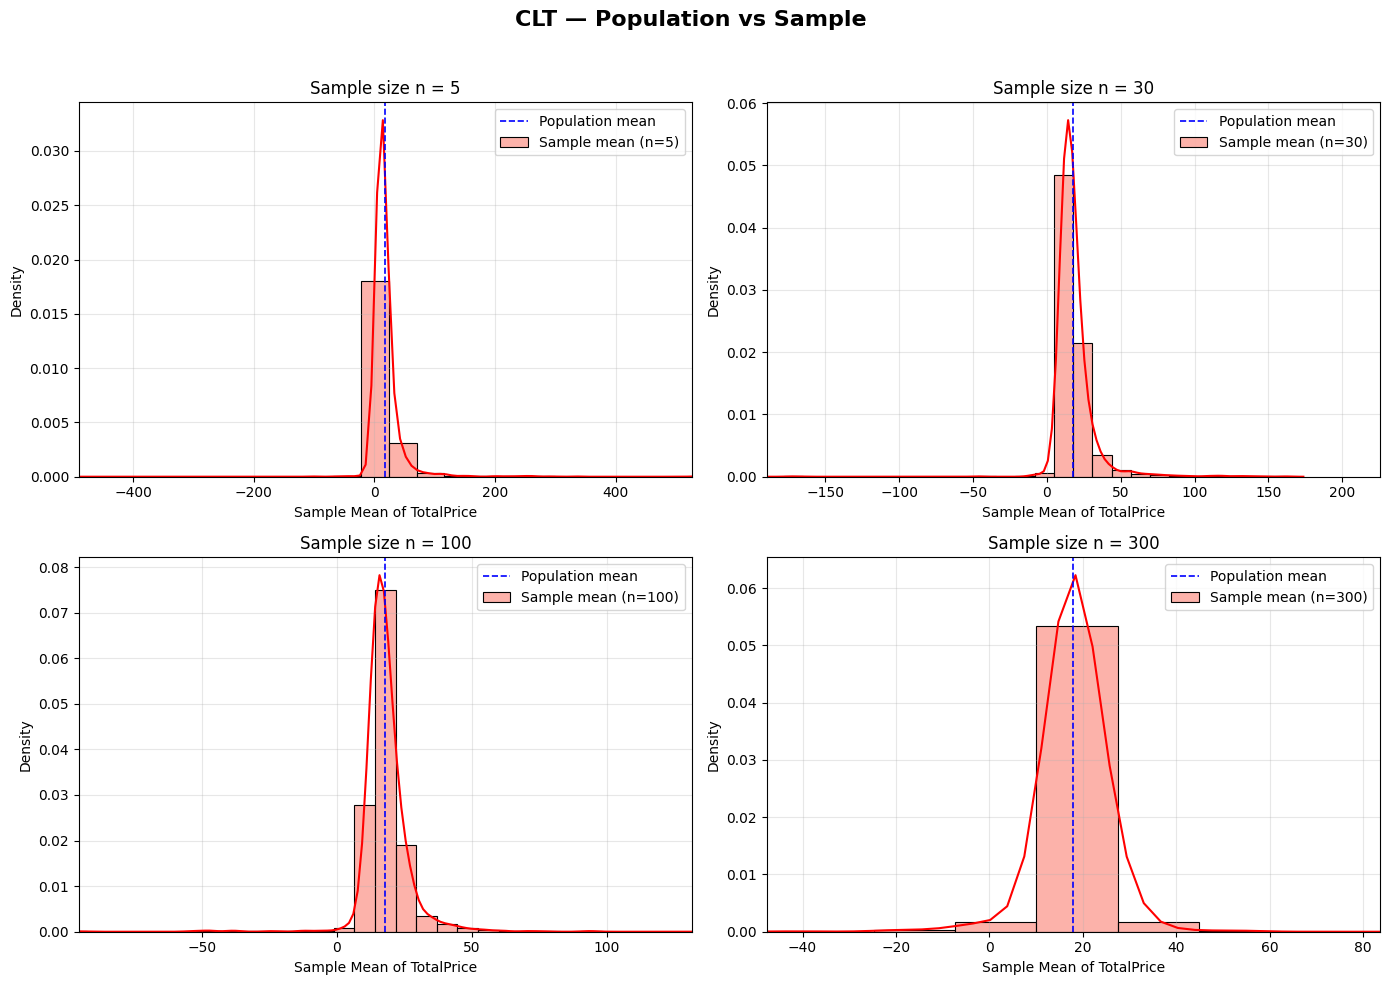


 CLT 해석

- 모집단 평균 μ = 17.99, 표준편차 σ = 378.81
- n이 커질수록 표본평균의 분포 폭은 σ/√n 만큼 감소하고, μ 근처로 집중됨.
- 즉, n≥30 이상에서 표본평균의 분포는 정규분포에 수렴하며, 현재 표본(1000건)은 모집단의 중심경향을 잘 반영함.


In [53]:
"""
🦋 1_3. 중심극한정리를 사용해 모집단과 표본의 차이를 설명해주세요

목적:
 - 모집단의 분포가 비정규(왜도, 첨도 존재)하더라도
   표본평균들의 분포는 정규분포로 수렴함을 시각화

- 표본평균이 “모집단 평균 μ 근처 ±3σ/√n” 범위 안에 대부분 몰려 있어, 이 구간만 x축으로 확대함.
  실제 모집단의 분산은 전체데이터의 폭을 보여주지만, 표본평균의 분산은 평균의 불확실성을 보여줍니다.
  이에 CLT시각화에 대허서 전체 데이터 대신, 표본 평균이 집중되는 범위를 확대하여 봄으로써
  표본크기에 따른 정규 분포 수렴을 확인하였습니다.
"""

# ---------------------------------------
# 0. data 정리

sample_sizes = [5, 30, 100, 300]
n_iter = 2000
population = df_popu["TotalPrice"].dropna()

def sample_means(data, n, n_iter=2000):
    return [np.mean(np.random.choice(data, n, replace=True)) for _ in range(n_iter)] # 표본평균 분포 생성


# ---------------------------------------
# 시각화
# 모집단의 분산(표준편차 378.8)과 TotalPrice(0~100) 크기 차이 고려,
# x 축 범위를 자동 조정함
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("CLT — Population vs Sample ", fontsize=16, fontweight='bold')

mu, sigma = np.mean(population), np.std(population)

for i, n in enumerate(sample_sizes):
    ax = axes[i//2, i%2]
    means = sample_means(population, n, n_iter)

    # 중심구간(±3σ/√n)만 확대
    x_min = mu - 3 * sigma / np.sqrt(n)
    x_max = mu + 3 * sigma / np.sqrt(n)

    sns.histplot(means, bins=40, stat='density', color='salmon', alpha=0.6, ax=ax, label=f'Sample mean (n={n})')
    sns.kdeplot(means, color='red', lw=1.5, ax=ax)
    ax.axvline(mu, color='blue', linestyle='--', lw=1.2, label='Population mean')

    ax.set_xlim(x_min, x_max)
    ax.set_title(f"Sample size n = {n}")
    ax.set_xlabel("Sample Mean of TotalPrice")
    ax.set_ylabel("Density")
    ax.legend()
    ax.grid(alpha=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 해석
print(f"\n CLT 해석\n")
print(f"- 모집단 평균 μ = {mu:.2f}, 표준편차 σ = {sigma:.2f}")
print(f"- n이 커질수록 표본평균의 분포 폭은 σ/√n 만큼 감소하고, μ 근처로 집중됨.")
print(f"- 즉, n≥30 이상에서 표본평균의 분포는 정규분포에 수렴하며, 현재 표본({len(df_stratified)}건)은 모집단의 중심경향을 잘 반영함.")


## 2. 주문이 가장 많은 상위 두 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요. 🌷
####2_1. 'Country' 변수를 바탕으로 주문이 가장 많은 상위 두 국가를 찾으세요.
####2_2. 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요.  
####2_3. t-통계량과 p-값을 해석하여 결과를 설명하고, 1종 오류와 2종 오류의 개념을 적용하여 설명해주세요.

In [54]:
"""
## 2. 주문이 가장 많은 상위 두 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요.
   🌷 2_1. 'Country' 변수를 바탕으로 주문이 가장 많은 상위 두 국가를 찾으세요.
"""
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
#---------------------------------------------------------
# 국가별 주문 건수
country_counts = df_popu['Country'].value_counts()

# 상위 2개 국가
country_top2 = country_counts.index[:2].tolist()

#---------------------------------------------------------
# 결과 출력
print("1. 상위 2개 국가 및 주문 건수")
for i, (country, count) in enumerate(zip(country_top2, country_counts.values[:2]), start=1):
    print(f"{i}. {country:<15} → {count:>7,} 건")

country_1 = df_popu[df_popu['Country'] == country_top2[0]]
country_2 = df_popu[df_popu['Country'] == country_top2[1]]

# 상위 2개 국가 통계 (TotalPrice 중심)
desc_summary = pd.DataFrame({
    '주문건수': [len(country_1), len(country_2)],
    '평균': [country_1['TotalPrice'].mean(), country_2['TotalPrice'].mean()],
    '표준편차': [country_1['TotalPrice'].std(), country_2['TotalPrice'].std()],
    'median': [country_1['TotalPrice'].median(), country_2['TotalPrice'].median()]
}, index=country_top2).round(3)

print("\n2.#상위 2개 국가 통계 (TotalPrice 중심) \n")
display(desc_summary)


1. 상위 2개 국가 및 주문 건수
1. United Kingdom  → 495,478 건
2. Germany         →   9,495 건

2.#상위 2개 국가 통계 (TotalPrice 중심) 



,주문건수,평균,표준편차,median
United Kingdom,495478,16.525,394.839,8.29
Germany,9495,23.349,37.325,16.60


In [60]:
"""
🦋 2_2. 상위 두 국가 간 'TotalPrice' 평균 비교 및 검정
         (1. 통계 계산 → 2. 정규성/등분산성 검정 + t-test → 3. 결론)
"""
from scipy.stats import skew, kurtosis, shapiro, levene, ttest_ind

# ----------------------------------------
# 0. 변수 설정
country_names = country_top2

country_1 = pd.to_numeric(country_1['TotalPrice'], errors='coerce').dropna()
country_2 = pd.to_numeric(country_2['TotalPrice'], errors='coerce').dropna()

n1, n2 = len(country_1), len(country_2)


# ----------------------------------------
# 1. 통계 계산
stats_1 = {
    "Mean": country_1.mean(),
    "Std": country_1.std(),
    "Skew": skew(country_1),
    "Kurt": kurtosis(country_1)
}
stats_2 = {
    "Mean": country_2.mean(),
    "Std": country_2.std(),
    "Skew": skew(country_2),
    "Kurt": kurtosis(country_2)
}
diff_stats = {k: (stats_2[k] - stats_1[k]) / (abs(stats_1[k]) + 1e-12) * 100 for k in stats_1}

compare_df = pd.DataFrame([stats_1, stats_2, diff_stats],
                          index=[country_names[0], country_names[1], "Difference (%)"]).round(3)

print(f"\n1. 통계 비교 결과 ({country_names[0]} vs {country_names[1]})")
display(compare_df)

# ----------------------------------------
# 2. 정규성 → 등분산성 → 독립표본 t-test (Welch or Student)
print("\n2. 정규성 및 등분산성 검정 → t-test 적용")

# 정규성 검정 (Shapiro-Wilk) — 표본 크기가 크면 일부 샘플링
sample_c_1 = country_1.sample(min(5000, len(country_1)), random_state=42)
sample_c_2 = country_2.sample(min(5000, len(country_2)), random_state=42)

stat_1, p_1 = shapiro(sample_c_1)
stat_2, p_2 = shapiro(sample_c_2)

print(f"{country_names[0]} 정규성 p={p_1:.4f}, {country_names[1]} 정규성 p={p_2:.4f}")
if p_1 < 0.05 or p_2 < 0.05:
    print("→ 일부 데이터는 비정규 분포 형태를 가질 가능성이 있음 (t-test ~ 중심극한정리로 근사 가능)")

# 등분산 검정 (Levene)
stat_levene, p_levene = levene(country_1, country_2)
equal_var = p_levene > 0.05
print(f"Levene 등분산 검정: stat={stat_levene:.3f}, p={p_levene:.4f}")
if equal_var:
    print("→ 분산이 통계적으로 동일 → Student’s t-test 적용")
else:
    print("→ 분산이 통계적으로 다름 → Welch’s t-test 적용")

# t-test 수행
t_stat, p_t = ttest_ind(country_1, country_2, equal_var=equal_var)
test_type = "Student" if equal_var else "Welch"
print(f"{test_type}'s t-test 결과: t = {t_stat:.3f}, p = {p_t:.4f}")

# ----------------------------------------
# 3. 결론 요약
if p_t < 0.05:
    print(f"""
3. 결론:
{country_names[0]}과(와) {country_names[1]}의 'TotalPrice' 평균은 통계적으로 유의하게 다릅니다.
→ {test_type}'s t-test 결과(p={p_t:.4f}) 기준으로 평균 차이가 존재하며,
   이는 구매 규모나 거래 단가 구조의 차이를 시사합니다.
→ 정규성(p1={p_1:.4f}, p2={p_2:.4f}), 등분산성(p={p_levene:.4f}) 검정을 통해
   적절한 t-test 방식이 자동 적용되었습니다.
""")
else:
    print(f"""
3. 결론:
두 국가의 평균 차이는 통계적으로 유의하지 않습니다 (p={p_t:.4f}).
→ 거래 규모나 분포 구조가 유사한 집단으로 판단됩니다.
→ 정규성(p1={p_1:.4f}, p2={p_2:.4f}), 등분산성(p={p_levene:.4f}) 결과를 근거로,
   t-test({test_type})가 올바르게 적용되었습니다.
""")


1. 통계 비교 결과 (United Kingdom vs Germany)


,Mean,Std,Skew,Kurt
United Kingdom,16.525,394.839,-0.917,140103.938
Germany,23.349,37.325,5.706,108.931
Difference (%),41.294,-90.547,722.050,-99.922



2. 정규성 및 등분산성 검정 → t-test 적용
United Kingdom 정규성 p=0.0000, Germany 정규성 p=0.0000
→ 일부 데이터는 비정규 분포 형태를 가질 가능성이 있음 (t-test ~ 중심극한정리로 근사 가능)
Levene 등분산 검정: stat=0.257, p=0.6125
→ 분산이 통계적으로 동일 → Student’s t-test 적용
Student's t-test 결과: t = -1.684, p = 0.0922

3. 결론:
두 국가의 평균 차이는 통계적으로 유의하지 않습니다 (p=0.0922).
→ 거래 규모나 분포 구조가 유사한 집단으로 판단됩니다.
→ 정규성(p1=0.0000, p2=0.0000), 등분산성(p=0.6125) 결과를 근거로,
   t-test(Student)가 올바르게 적용되었습니다.



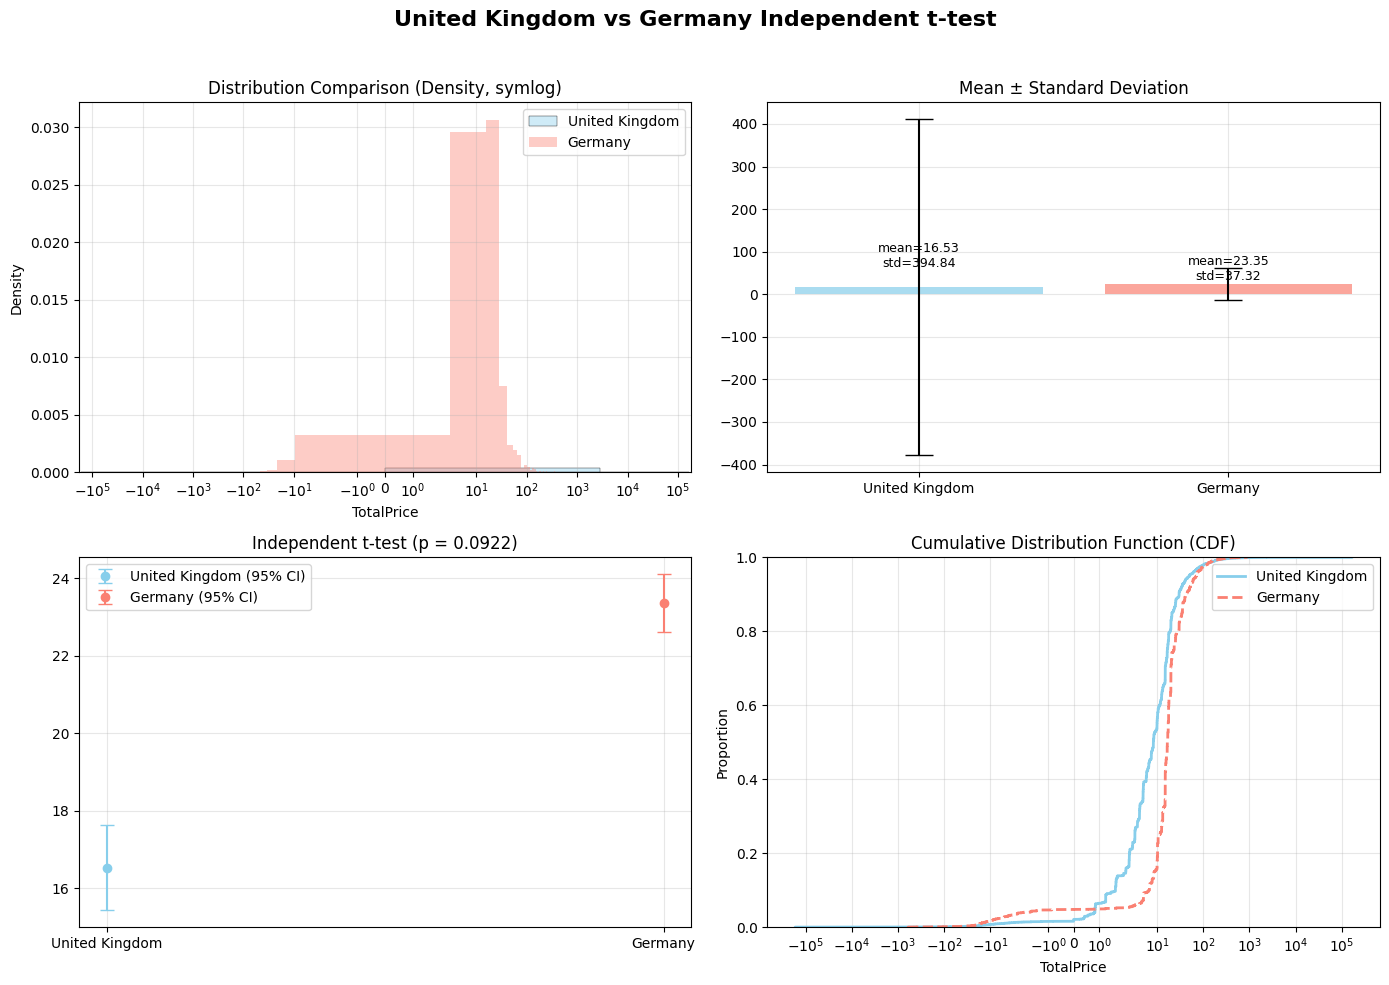

In [62]:
"""
## 2. 주문이 가장 많은 상위 두 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요.
   🌷 2_2. 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요.

      - 목표 : 두  국가의TotalPrice가 통계적으로 다른가?” 검증
      - 독립표본 t-test (Welch or Student)
"""
# 시각화
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle(f"{country_top2[0]} vs {country_top2[1]} Independent t-test",
             fontsize=16, fontweight='bold')
# ----------------------------------------
# 1. 분포 비교 (count+Density)
sns.histplot(country_1, bins=120, stat='density', alpha=0.4,
             color='skyblue', label=country_names[0], ax=axes[0,0])
sns.histplot(country_2, bins=120, stat='density', alpha=0.4,
             color='salmon', label=country_names[1], ax=axes[0,0])
axes[0,0].set_xscale('symlog')
axes[0,0].set_title('Distribution Comparison (Density, symlog)')
axes[0,0].set_xlabel('TotalPrice')
axes[0,0].set_ylabel('Density')
axes[0,0].legend()
axes[0,0].grid(alpha=0.3)

# ----------------------------------------
# 2. 평균 , 표준편차
groups = [country_top2[0], country_top2[1]]
means = [country_1.mean(), country_2.mean()]
stds = [country_1.std(), country_2.std()]
axes[0,1].bar(groups, means, yerr=stds, capsize=10,
              color=['skyblue', 'salmon'], alpha=0.7)
axes[0,1].set_title("Mean ± Standard Deviation")
axes[0,1].grid(alpha=0.3)
for i, (m, s) in enumerate(zip(means, stds)):
    axes[0,1].text(i, m + s*0.1, f"mean={m:.2f}\nstd={s:.2f}",
                   ha='center', va='bottom', fontsize=9)

# ----------------------------------------
# 3. t-test 95% 신뢰구간
ci = 1.96
n1, n2 = len(country_1), len(country_2)
c1_ci = [country_1.mean() - ci * country_1.std()/np.sqrt(n1),
         country_1.mean() + ci * country_1.std()/np.sqrt(n1)]
c2_ci = [country_2.mean() - ci * country_2.std()/np.sqrt(n2),
         country_2.mean() + ci * country_2.std()/np.sqrt(n2)]

axes[1,0].errorbar(1, country_1.mean(),
                   yerr=[[country_1.mean() - c1_ci[0]], [c1_ci[1] - country_1.mean()]],
                   fmt='o', color='skyblue', capsize=5, label=f'{country_top2[0]} (95% CI)')
axes[1,0].errorbar(2, country_2.mean(),
                   yerr=[[country_2.mean() - c2_ci[0]], [c2_ci[1] - country_2.mean()]],
                   fmt='o', color='salmon', capsize=5, label=f'{country_top2[1]} (95% CI)')
axes[1,0].set_xticks([1, 2])
axes[1,0].set_xticklabels(groups)
axes[1,0].set_title(f"Independent t-test (p = {p_t:.4f})")
axes[1,0].grid(alpha=0.3)
axes[1,0].legend()

# ----------------------------------------
# 4. 누적분포 CDF
sns.ecdfplot(country_1, color='skyblue', label=country_top2[0], ax=axes[1,1], linewidth=2)
sns.ecdfplot(country_2, color='salmon', label=country_top2[1], ax=axes[1,1], linewidth=2, linestyle='--')
axes[1,1].set_xscale('symlog')
axes[1,1].set_title("Cumulative Distribution Function (CDF)")
axes[1,1].legend()
axes[1,1].grid(alpha=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [63]:
"""
🌷 2_3. t-통계량과 p-값을 해석하고, 1종 오류와 2종 오류 개념을 적용하여 설명하세요.
       (정규성 + 등분산성 검정 후, Welch 또는 Student t-test 자동 적용)
"""

from scipy.stats import shapiro, levene, ttest_ind

# ---------------------------------------------
# 0️⃣ 변수 설정
country_1_name, country_2_name = country_top2[0], country_top2[1]
n1, n2 = len(country_1), len(country_2)

print(f"🦋 2_3. {country_1_name} vs {country_2_name} — t-test 해석 및 결론\n")

# ---------------------------------------------
# 정규성 검정 (Shapiro-Wilk)
print("1. 정규성 검정 (Shapiro-Wilk Test)")
sample_1 = country_1.sample(min(5000, len(country_1)), random_state=42)
sample_2 = country_2.sample(min(5000, len(country_2)), random_state=42)

stat_1, p_1 = shapiro(sample_1)
stat_2, p_2 = shapiro(sample_2)
print(f" - {country_1_name} p={p_1:.4f}, {country_2_name} p={p_2:.4f}")

if p_1 < 0.05 or p_2 < 0.05:
    print(" → 일부 비정규성 존재 가능, 중심극한정리에 따라 근사 정규분포로 가정 가능.")
else:
    print(" → 두 집단 모두 정규분포를 따름.")

# ---------------------------------------------
# 등분산성 검정 (Levene)
print("\n2. 등분산성 검정 (Levene Test)")
stat_levene, p_levene = levene(country_1, country_2)
equal_var = p_levene > 0.05
print(f" - Levene stat={stat_levene:.3f}, p={p_levene:.4f}")
if equal_var:
    print(" → 분산이 동일하므로 Student’s t-test 적용.")
else:
    print(" → 분산이 다르므로 Welch’s t-test 적용.")

# ---------------------------------------------
# 독립표본 t-test
print("\n3.  독립표본 t-test 결과")
t_stat, p_val = ttest_ind(country_1, country_2, equal_var=equal_var)
test_type = "Student" if equal_var else "Welch"
print(f" - {test_type}'s t-test: t = {t_stat:.3f}, p = {p_val:.4f}\n")

# ---------------------------------------------
# t-통계량 및 p-값 해석
print("4. 통계적 해석")
if p_val < 0.05:
    print(f" → 유의수준 0.05에서 귀무가설 기각 → 평균이 통계적으로 다름.\n")
else:
    print(f" → 유의수준 0.05에서 귀무가설 기각 불가 → 평균 차이 통계적으로 유의하지 않음.\n")

# ---------------------------------------------
#  오류유형 해석
print("5. 오류유형 해석")
if p_val < 0.05:
    print(" - 1종 오류(Type I Error): 실제 평균이 같지만 다르다고 판단할 위험 (α=0.05)")
    print(" - 2종 오류(Type II Error): 실제로 다름에도 같다고 판단할 위험은 낮음.\n")
else:
    print(" - 1종 오류(Type I Error): 귀무가설을 유지했으므로 발생하지 않음.")
    print(" - 2종 오류(Type II Error): 실제 차이가 있음에도 차이를 놓칠 가능성 존재.\n")

# ---------------------------------------------
#  결론
print("6. 결론 요약")
if p_val >= 0.05:
    print(f"""
결론:
{test_type}'s 독립표본 t-검정 결과,
{country_1_name}(평균 {country_1.mean():.2f})과(와) {country_2_name}(평균 {country_2.mean():.2f})의
평균 차이는 통계적으로 유의하지 않았습니다
(t = {t_stat:.3f}, p = {p_val:.4f} > 0.05).

→ 두 국가의 구매행태는 통계적으로 유사한 수준으로 판단됩니다.
→ 정규성(p1={p_1:.4f}, p2={p_2:.4f}) 및 등분산성(p={p_levene:.4f}) 검정을 통해
   적절한 t-test 유형이 적용한 결과,
→ 1종 오류 위험 없음, 2종 오류 가능성은 낮은 수준입니다.
""")
else:
    print(f"""
결론:
{test_type}'s 독립표본 t-검정 결과,
{country_1_name}(평균 {country_1.mean():.2f})과(와) {country_2_name}(평균 {country_2.mean():.2f})의
평균은 통계적으로 유의하게 다릅니다
(t = {t_stat:.3f}, p = {p_val:.4f} < 0.05).

→ 이는 두 국가의 거래 구조나 소비 규모가 통계적으로 다를 가능성을 시사합니다.
→ 정규성(p1={p_1:.4f}, p2={p_2:.4f}) 및 등분산성(p={p_levene:.4f})을 고려해
   적합한 t-test 방식을 적용했습니다.
→ 1종 오류(실제 차이가 없는데 다르다고 판단할 위험)는 존재하지만,
   검정 결과는 유의수준 0.05 하에서 신뢰 가능합니다.
""")

🦋 2_3. United Kingdom vs Germany — t-test 해석 및 결론

1. 정규성 검정 (Shapiro-Wilk Test)
 - United Kingdom p=0.0000, Germany p=0.0000
 → 일부 비정규성 존재 가능, 중심극한정리에 따라 근사 정규분포로 가정 가능.

2. 등분산성 검정 (Levene Test)
 - Levene stat=0.257, p=0.6125
 → 분산이 동일하므로 Student’s t-test 적용.

3.  독립표본 t-test 결과
 - Student's t-test: t = -1.684, p = 0.0922

4. 통계적 해석
 → 유의수준 0.05에서 귀무가설 기각 불가 → 평균 차이 통계적으로 유의하지 않음.

5. 오류유형 해석
 - 1종 오류(Type I Error): 귀무가설을 유지했으므로 발생하지 않음.
 - 2종 오류(Type II Error): 실제 차이가 있음에도 차이를 놓칠 가능성 존재.

6. 결론 요약

결론:
Student's 독립표본 t-검정 결과,
United Kingdom(평균 16.53)과(와) Germany(평균 23.35)의
평균 차이는 통계적으로 유의하지 않았습니다
(t = -1.684, p = 0.0922 > 0.05).

→ 두 국가의 구매행태는 통계적으로 유사한 수준으로 판단됩니다.
→ 정규성(p1=0.0000, p2=0.0000) 및 등분산성(p=0.6125) 검정을 통해
   적절한 t-test 유형이 적용한 결과,
→ 1종 오류 위험 없음, 2종 오류 가능성은 낮은 수준입니다.



## 3. 주중, 주말에 따라서 발생하는 UnitPrice의 분포가 달라지는지 확인하세요. 👻

####3_1. 주중의 'UnitPrice'와 주말의 'UnitPrice'의 분포를 분석하기 위해 데이터의 중심경향치(평균, 중간값), 변산성(표준편차, 분산), 분위수를 계산하세요.  
####3_2. 상자수염그림과 히스토그램을 그려 시각화를 통해 분포를 확인하고 데이터의 분포에 대해 설명해주세요.

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,InvoiceMonth,IsBadDebt,IsReturn
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2,12,False,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12,False,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2,12,False,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12,False,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12,False,False


In [64]:
"""
3. 주중, 주말에 따라서 발생하는 UnitPrice의 분포가 달라지는지 확인하세요. 👻

   👻 3_1. 주중의 'UnitPrice'와 주말의 'UnitPrice'의 분포를 분석하기 위해 데이터의 중심경향치(평균, 중간값), 변산성(표준편차, 분산), 분위수를 계산하세요.
           주중 vs 주말의 'UnitPrice' 분포 비교
          (중심경향치, 변산성, 분위수 + Boxplot, Histogram 시각화)
"""


from scipy.stats import skew, kurtosis

# ---------------------------------------------
# 주중/주말 구분 (위위위 DayOfWeek 있음)
df['WeekType'] = np.where(df['DayOfWeek'] < 5, 'Weekday', 'Weekend')

weekday_data = df[df['WeekType'] == 'Weekday']['UnitPrice']
weekend_data = df[df['WeekType'] == 'Weekend']['UnitPrice']

n_wd, n_we = len(weekday_data), len(weekend_data)
print(f"1. 확인: 주중({n_wd}건), 주말({n_we}건)")

# ---------------------------------------------
# 0. 통계
def describe_stats(series):
    return {
        "Mean": series.mean(),
        "Median": series.median(),
        "Std": series.std(),
        "Variance": series.var(),
        "Skew": skew(series),
        "Kurt": kurtosis(series),
        "Q1": series.quantile(0.25),
        "Q3": series.quantile(0.75),
        "IQR": series.quantile(0.75) - series.quantile(0.25)
    }

weekday_stats = describe_stats(weekday_data)
weekend_stats = describe_stats(weekend_data)
diff_stats = {k: (weekend_stats[k] - weekday_stats[k]) / (abs(weekday_stats[k]) + 1e-9) * 100 for k in weekday_stats}

compare_df = pd.DataFrame([weekday_stats, weekend_stats, diff_stats],
                          index=["Weekday", "Weekend", "Diff (%)"]).round(3)

print("\n2. 주중 vs 주말 (UnitPrice)")
display(compare_df)


1. 확인: 주중(477534건), 주말(64375건)

2. 주중 vs 주말 (UnitPrice)


,Mean,Median,Std,Variance,Skew,Kurt,Q1,Q3,IQR
Weekday,4.843,2.100,103.032,10615.605,175.287,52081.907,1.25,4.130,2.880
Weekend,2.888,1.850,7.959,63.354,116.624,17394.106,1.25,3.750,2.500
Diff (%),-40.376,-11.905,-92.275,-99.403,-33.467,-66.602,0.00,-9.201,-13.194



1. 시각화 


/tmp/ipython-input-1077838530.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='WeekType', y='UnitPrice', data=plot_df, palette=['skyblue', 'salmon'], ax=axes[0,1])
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


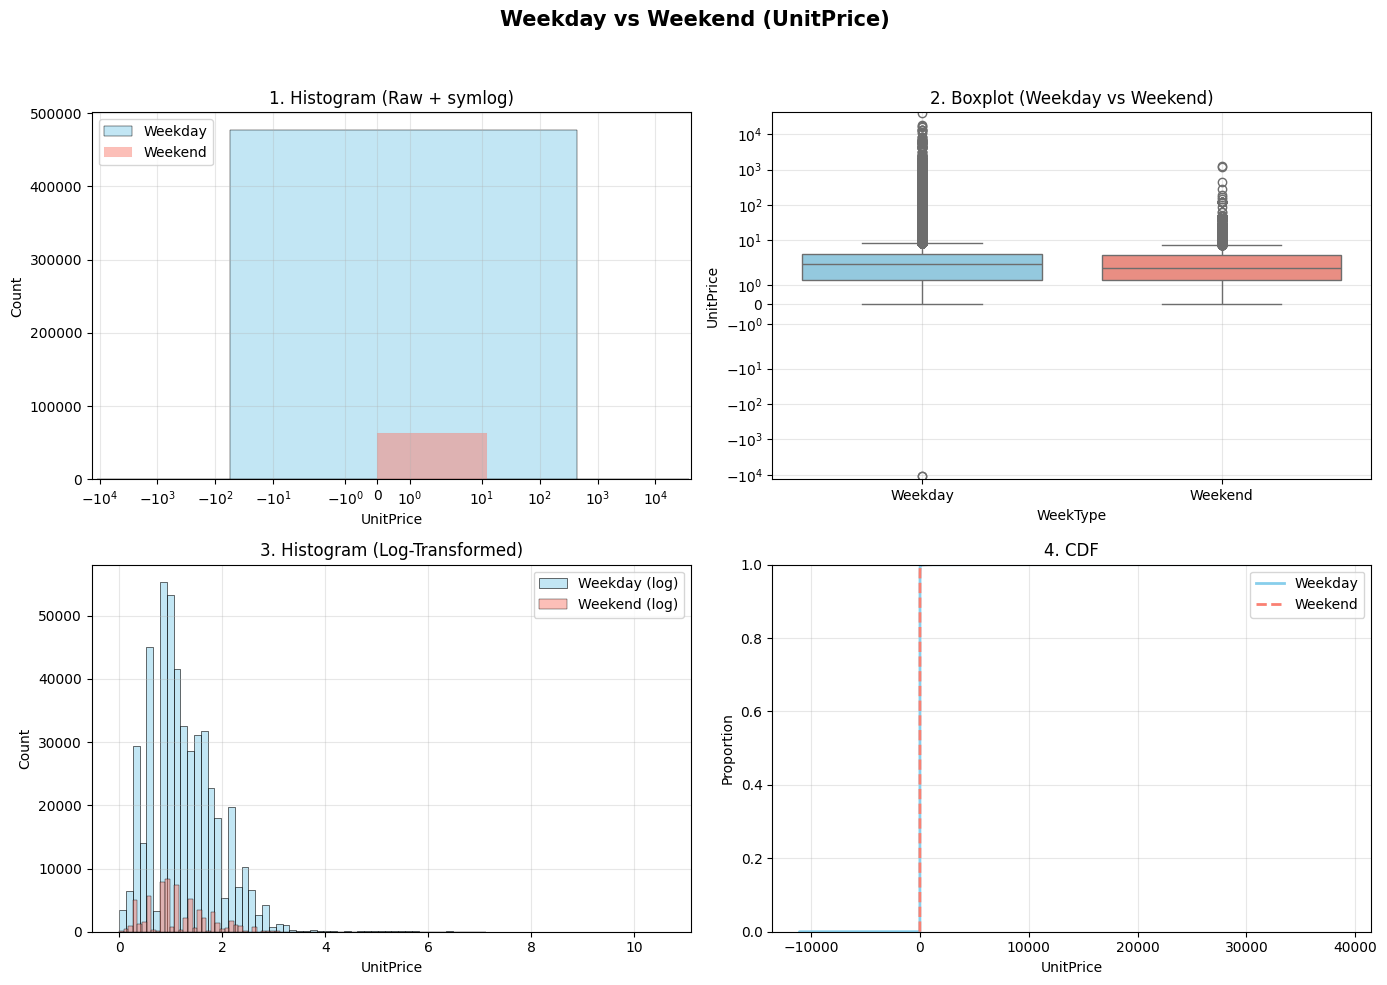


2. 분포 해석
→ 평균이 -40.38% 차이로, 주중·주말 간 가격 수준이 다를 가능성이 있습니다.
→ 주중의 변동성이 더 큽니다 (92.28%).
→ 주중의 왜도가 더 크므로 오른쪽으로 긴 꼬리를 가짐 (고가 상품 영향 ↑).

3. 해석
→ 평균 차이: -40.38% → 주중의 평균 UnitPrice가 주말보다 높음.
→ 변동성: 주중 표준편차(103.03) > 주말 표준편차(7.96) → 주중 가격 변동 폭이 더 큼.
→ 왜도(Skew): Weekday(175.29), Weekend(116.62) → 둘 다 오른쪽으로 긴 꼬리를 가진 비대칭 분포 (Positive skew)*.
→ 첨도(Kurt): Weekday(52081.91) > Weekend(17394.11) → 주중의 극단적 고가 거래(Upper)가 더 많음.

4. 결론
- 주중과 주말 모두 UnitPrice 분포는 오른쪽으로 긴 꼬리를 가진 비대칭(Positive Skew) 형태입니다.
- 특히 주중에는 고가 상품 거래의 비중이 높고, 변동성이 커서 평균을 끌어올리는 Upper_UnitPrice가 많습니다.
- 반면 주말에는 저가 상품 중심의 안정적 판매 경향을 보여, 가격 분포가 비교적 집중되어 있습니다.


In [65]:
"""
3. 주중, 주말에 따라서 발생하는 UnitPrice의 분포가 달라지는지 확인하세요. 👻

   👻 3_2. 상자수염그림과 히스토그램을 그려 시각화를 통해 분포를 확인하고 데이터의 분포에 대해 설명해주세요.
           주중 vs 주말의 'UnitPrice' 분포 비교
          (중심경향치, 변산성, 분위수 + Boxplot, Histogram 시각화)
"""

#  1. 시각화
print("\n1. 시각화 ")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Weekday vs Weekend (UnitPrice)", fontsize=15, fontweight='bold')

# 1.히스토그램 (symlog)
sns.histplot(weekday_data, bins=100, color='skyblue', label='Weekday', alpha=0.5, ax=axes[0,0])
sns.histplot(weekend_data, bins=100, color='salmon', label='Weekend', alpha=0.5, ax=axes[0,0])
axes[0,0].set_xscale('symlog')
axes[0,0].set_title( "1. Histogram (Raw + symlog)")
axes[0,0].legend()
axes[0,0].grid(alpha=0.3)

# 2. Boxplot
plot_df = pd.DataFrame({
    'UnitPrice': np.concatenate([weekday_data.values, weekend_data.values]),
    'WeekType': ['Weekday'] * len(weekday_data) + ['Weekend'] * len(weekend_data)
})

sns.boxplot(x='WeekType', y='UnitPrice', data=plot_df, palette=['skyblue', 'salmon'], ax=axes[0,1])
axes[0,1].set_yscale('symlog')
axes[0,1].set_title("2. Boxplot (Weekday vs Weekend)")
axes[0,1].grid(alpha=0.3)

# 3. 로그변환 히스토그램
sns.histplot(np.log1p(weekday_data), bins=80, color='skyblue', alpha=0.5, label='Weekday (log)', ax=axes[1,0])
sns.histplot(np.log1p(weekend_data), bins=80, color='salmon', alpha=0.5, label='Weekend (log)', ax=axes[1,0])
axes[1,0].set_title("3. Histogram (Log-Transformed)")
axes[1,0].legend()
axes[1,0].grid(alpha=0.3)

# 4. 누적분포 CDF
sns.ecdfplot(weekday_data, color='skyblue', label='Weekday', linewidth=2, ax=axes[1,1])
sns.ecdfplot(weekend_data, color='salmon', label='Weekend', linewidth=2, linestyle='--', ax=axes[1,1])
axes[1,1].set_title("4. CDF")
axes[1,1].legend()
axes[1,1].grid(alpha=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# ---------------------------------------------
# 분포 해석

mean_diff = compare_df.loc["Diff (%)", "Mean"]
std_diff = compare_df.loc["Diff (%)", "Std"]
skew_diff = compare_df.loc["Diff (%)", "Skew"]

print("\n2. 분포 해석")

if abs(mean_diff) < 10:
    print(f"→ 평균 차이는 {mean_diff:.2f}%로 주중·주말 간 가격 수준은 유사합니다.")
else:
    print(f"→ 평균이 {mean_diff:.2f}% 차이로, 주중·주말 간 가격 수준이 다를 가능성이 있습니다.")

# 표준편차
if abs(std_diff) < 20:
    print(f"→ 표준편차 차이 {std_diff:.2f}%: 변동성은 유사한 편입니다.")
elif std_diff > 0:
    print(f"→ 주말의 표준편차가 {std_diff:.2f}% 높아 가격 변동이 더 큽니다.")
else:
    print(f"→ 주중의 변동성이 더 큽니다 ({abs(std_diff):.2f}%).")

# 왜도  (절대값 기준으로 비대칭성 판단)
weekday_skew = weekday_stats["Skew"]
weekend_skew = weekend_stats["Skew"]

if max(abs(weekday_skew), abs(weekend_skew)) < 1:
    print("→ 두 분포 모두 거의 대칭에 가까움.")
elif weekday_skew > weekend_skew:
    print("→ 주중의 왜도가 더 크므로 오른쪽으로 긴 꼬리를 가짐 (고가 상품 영향 ↑).")
else:
    print("→ 주말의 왜도가 더 크므로 오른쪽 꼬리가 더 길음 (고가 상품 비중 ↑).")


# ---------------------------------------------
print("\n3. 해석")
print(f"→ 평균 차이: {mean_diff:.2f}% → 주중의 평균 UnitPrice가 주말보다 높음.")
print(f"→ 변동성: 주중 표준편차({weekday_stats['Std']:.2f}) > 주말 표준편차({weekend_stats['Std']:.2f}) → 주중 가격 변동 폭이 더 큼.")
print(f"→ 왜도(Skew): Weekday({weekday_skew:.2f}), Weekend({weekend_skew:.2f}) → 둘 다 오른쪽으로 긴 꼬리를 가진 비대칭 분포 (Positive skew)*.")
print(f"→ 첨도(Kurt): Weekday({weekday_stats['Kurt']:.2f}) > Weekend({weekend_stats['Kurt']:.2f}) → 주중의 극단적 고가 거래(Upper)가 더 많음.\n")

# ---------------------------------------------
print("4. 결론")
print("- 주중과 주말 모두 UnitPrice 분포는 오른쪽으로 긴 꼬리를 가진 비대칭(Positive Skew) 형태입니다.")
print("- 특히 주중에는 고가 상품 거래의 비중이 높고, 변동성이 커서 평균을 끌어올리는 Upper_UnitPrice가 많습니다.")
print("- 반면 주말에는 저가 상품 중심의 안정적 판매 경향을 보여, 가격 분포가 비교적 집중되어 있습니다.")

In [ ]:
"""
3. 주중, 주말에 따라서 발생하는 UnitPrice의 분포가 달라지는지 확인하세요. 👻

   👻 3_2. 상자수염그림과 히스토그램을 그려 시각화를 통해 분포를 확인하고 데이터의 분포에 대해 설명해주세요.
           주중 vs 주말의 'UnitPrice' 분포 비교
          (중심경향치, 변산성, 분위수 + Boxplot, Histogram 시각화)
"""
"""
3번 분석 결과

주중은 평균 단가와 변동성이 모두 더 높고, 첨도 또한 매우 커
일부 고가 거래로 전체 분포가 위에 있는 특징을 보입니다.

반면 주말은 상대적으로 저가 상품 중심의 안정적인 판매 패턴이 보이며,
분포가 주중보다 덜 왜곡되고 중앙집중도가 상대적으로 큽니다.

따라서 주중에는 이벤트나 굿즈, 그외 판매전략으로 고가거래가 많고, 주말에는 필요물품구매 또는 주중소비가 불가한 소비심리가 반영되어 중가 중심의 거래가 많을 가능성이 많습니다.
"""

## 4. 상품의 단가와 판매 국가, 판매 날짜을 이용해 판매 수량을 예측하는 회귀 모델을 만드세요.🎃
#### 4_1. 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.
#### 4_2. 변수를 다음과 같이 설정하여 다중 선형 회귀 분석을 진행하세요.
    * 종속변수: 판매 수량(`Quantity`)
    * 독립변수: 상품 단가(`UnitPrice`), 판매 국가(`Country`), 판매 요일(`DayOfWeek`), 판매 월( `InvoiceMonth`)   
#### 4_3. 회귀계수와 결정계수를 활용하여 회귀 분석 결과를 해석해주세요.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     541909 non-null  object        
 1   StockCode     541909 non-null  object        
 2   Description   540455 non-null  object        
 3   Quantity      541909 non-null  int64         
 4   InvoiceDate   541909 non-null  datetime64[ns]
 5   UnitPrice     541909 non-null  float64       
 6   CustomerID    541909 non-null  object        
 7   Country       541909 non-null  object        
 8   TotalPrice    541909 non-null  float64       
 9   DayOfWeek     541909 non-null  int32         
 10  InvoiceMonth  541909 non-null  int32         
 11  IsBadDebt     541909 non-null  bool          
 12  IsReturn      541909 non-null  bool          
 13  WeekType      541909 non-null  object        
dtypes: bool(2), datetime64[ns](1), float64(2), int32(2), int64(1), objec

In [66]:
"""
4. 상품의 단가와 판매 국가, 판매 날짜을 이용해 판매 수량을 예측하는 회귀 모델을 만드세요.

  🎃 4_1. 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.
           데이터 전처리(결측치확인, 이상치확인 및 처리)
"""

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 결측치 확인 및 처리
missing_summary = df[['Quantity', 'UnitPrice', 'Country', 'InvoiceDate']].isna().sum()
print("결측치 개수:\n", missing_summary)


결측치 개수:
 Quantity       0
UnitPrice      0
Country        0
InvoiceDate    0
dtype: int64


In [67]:
# 이상치 확인 및 처리
desc = df[['Quantity', 'UnitPrice']].describe().T
print("통계\n", desc)

통계
               count      mean         std       min   25%   50%    75%  \
Quantity   541909.0  9.552250  218.081158 -80995.00  1.00  3.00  10.00   
UnitPrice  541909.0  4.611114   96.759853 -11062.06  1.25  2.08   4.13   

               max  
Quantity   80995.0  
UnitPrice  38970.0  


In [68]:
# 이상치 확인 및 처리
# Quantity와 UnitPrice의 분포 왜곡 정도 확인
from scipy.stats import skew, kurtosis
print(f"\n왜도(Skew): Quantity={skew(df['Quantity']):.2f}, UnitPrice={skew(df['UnitPrice']):.2f}")
print(f"첨도(Kurtosis): Quantity={kurtosis(df['Quantity']):.2f}, UnitPrice={kurtosis(df['UnitPrice']):.2f}")


왜도(Skew): Quantity=-0.26, UnitPrice=186.51
첨도(Kurtosis): Quantity=119768.05, UnitPrice=59005.17


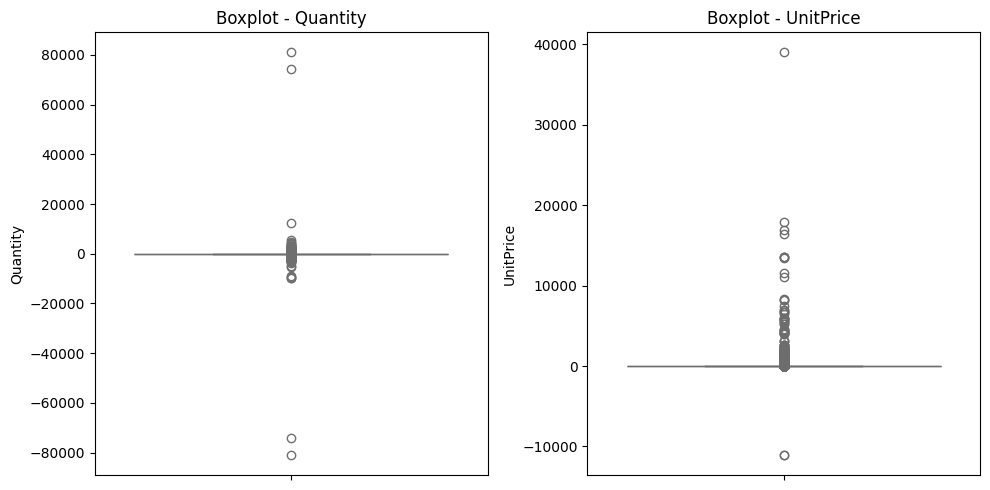

In [69]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(y=df['Quantity'], color='skyblue')
plt.title("Boxplot - Quantity")

plt.subplot(1,2,2)
sns.boxplot(y=df['UnitPrice'], color='salmon')
plt.title("Boxplot - UnitPrice")
plt.tight_layout()
plt.show()

In [70]:
def remove_outliers_iqr(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    IQR = q3 - q1
    lower = q1 - 1.5 * IQR
    upper = q3 + 1.5 * IQR
    before = len(data)
    data = data[(data[col] >= lower) & (data[col] <= upper)]
    after = len(data)
    print(f"{col} 이상치 제거: {before - after}건 제거 ({((before-after)/before)*100:.2f}%)")
    return data

# Quantity, UnitPrice 이상치 제거
df = remove_outliers_iqr(df, 'Quantity')
df = remove_outliers_iqr(df, 'UnitPrice')

print(f"\n 데이터 크기(이상치 제거 후) : {df.shape}")

Quantity 이상치 제거: 58619건 제거 (10.82%)
UnitPrice 이상치 제거: 32470건 제거 (6.72%)

 데이터 크기(이상치 제거 후) : (450820, 14)



 통계(이상치 제거)
              count      mean       std   min   25%  50%   75%   max
Quantity   450820.0  4.768103  4.603068 -12.0  1.00  3.0  7.00  23.0
UnitPrice  450820.0  2.780913  2.040645   0.0  1.25  2.1  3.75   8.5


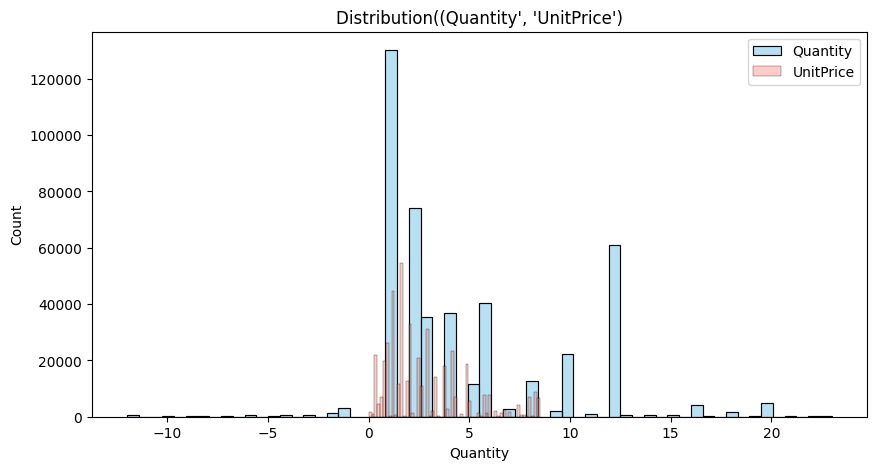

In [71]:
"""
4. 상품의 단가와 판매 국가, 판매 날짜을 이용해 판매 수량을 예측하는 회귀 모델을 만드세요.

  🎃 4_1. 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.
           데이터 전처리
"""
# 확인용 요약 통계
print("\n 통계(이상치 제거)")
print(df[['Quantity', 'UnitPrice']].describe().T)

plt.figure(figsize=(10,5))
sns.histplot(df['Quantity'], bins=60, color='skyblue', alpha=0.6, label='Quantity')
sns.histplot(df['UnitPrice'], bins=60, color='salmon', alpha=0.4, label='UnitPrice')
plt.legend()
plt.title("Distribution((Quantity', 'UnitPrice')")
plt.show()


In [72]:
"""
4. 상품의 단가와 판매 국가, 판매 날짜을 이용해 판매 수량을 예측하는 회귀 모델을 만드세요.

  🎃 4_2. 변수를 다음과 같이 설정하여 다중 선형 회귀 분석을 진행하세요.
         * 종속변수: 판매 수량(`Quantity`)
        * 독립변수: 상품 단가(`UnitPrice`), 판매 국가(`Country`), 판매 요일(`DayOfWeek`), 판매 월( `InvoiceMonth`)
"""

from sklearn.model_selection import train_test_split

# 1. 데이터 준비
cols = ['Quantity', 'UnitPrice', 'Country', 'DayOfWeek', 'InvoiceMonth']
df_reg = df[cols].copy()

print(f"데이터 크기: {df_reg.shape}")

# 2 원핫인코딩
# 상위 국가 5개 dummy 그외 "Other"
top5 = df_reg['Country'].value_counts().index[:5]
df_reg['Country'] = df_reg['Country'].apply(lambda x: x if x in top5 else 'Other')

df_reg = pd.get_dummies(df_reg, columns=['Country', 'DayOfWeek', 'InvoiceMonth'], drop_first=True)

# 독립변수(X), 종속변수(y)
y = df_reg['Quantity']
X = df_reg.drop(columns=['Quantity'])

# Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 회귀모델 학습
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print("회귀모델 학습 완료")

데이터 크기: (450820, 5)
회귀모델 학습 완료



 1. 회귀 모델 성능 
결정계수 (R²): 0.1278
평균절대오차 (MAE): 3.371
평균제곱근오차 (RMSE): 4.287

2. 주요 회귀계수 상위 10


,Variable,Coefficient
18,InvoiceMonth_9,0.8581
14,InvoiceMonth_5,0.8399
17,InvoiceMonth_8,0.8306
8,DayOfWeek_3,0.4869
11,InvoiceMonth_2,0.4607
19,InvoiceMonth_10,0.4489
13,InvoiceMonth_4,0.4392
15,InvoiceMonth_6,0.3726
2,Country_Germany,0.3685
12,InvoiceMonth_3,0.3597



 3. 시각회(회귀 모델) 


/tmp/ipython-input-211757699.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Variable', data=coef_df.head(10), palette='crest')


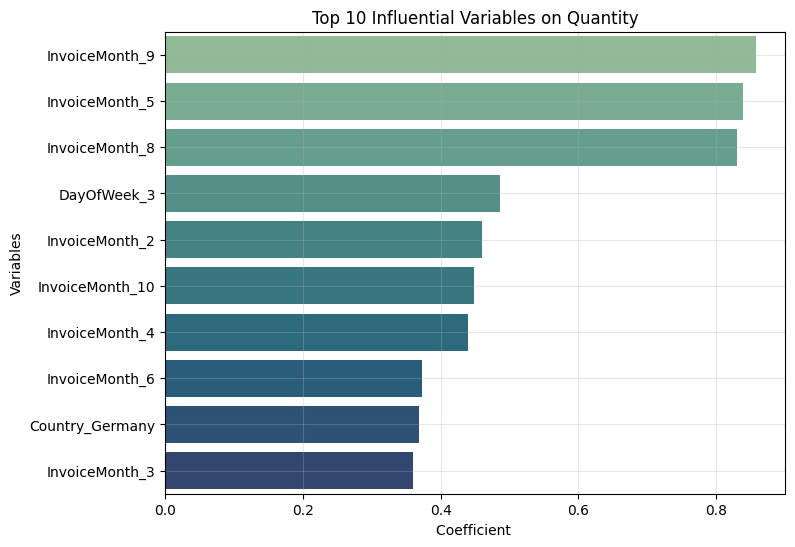


4. 회귀 분석 결과
- 결정계수 R²=0.128 → 모델이 전체 판매 수량 변동의 약 12.8%를 설명합니다.
- 평균 오차(MAE=3.37, RMSE=4.29)로 보아, 일부 이상치(outlier)의 영향이 존재합니다.

* 가장 영향력 있는 변수 Top5: InvoiceMonth_9, InvoiceMonth_5, InvoiceMonth_8, DayOfWeek_3, InvoiceMonth_2

5.  변수별 영향 해석
- InvoiceMonth 관련 변수들의 계수가 높음 → 계절적 요인(월별 수요 차이)이 판매량에 큰 영향을 미침.
- DayOfWeek 변수는 주중 중반(수·목요일) 판매량 증가 경향을 시사.
- UnitPrice의 계수는 상대적으로 작음 → 가격 자체보다는 시기적 요인이 판매량에 더 큰 영향.
- Country 변수는 상위 5개국 내에서 일부 지역별 소비 패턴 차이를 반영.

6.  결론
→ 모델 설명력ㅇ; 14%로 낮음, 시기(월·요일)가 판매 수량 변동의 주된 원인임을 확인함.
→ 판매 시기(월, 요일) 중심의 판매전략 수립이 효과적임. 특히 봄가을 판매 비중이 높으므로 봄,가을 중심의 상품 배치 및 이벤트 비중을 높이는게 효과적으로 예상됨
→ 향후 제품군별 세분화(카테고리 변수 추가, 피쳐엔지니어링)하거나 이상치를 제거하고 데이터를 정규화하는 등 변수의 정보량을 늪리는 방향으로 데이터를 세분화하면 더 유의미한 분석이 될 것으로 판단됨.


In [73]:
"""
4. 상품의 단가와 판매 국가, 판매 날짜을 이용해 판매 수량을 예측하는 회귀 모델을 만드세요.
   🎃 4_3. 회귀계수와 결정계수를 활용하여 회귀 분석 결과를 해석해주세요.

"""
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 4. 예측
y_pred = model.predict(X_test)

# 5. 성능평가
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n 1. 회귀 모델 성능 ")
print(f"결정계수 (R²): {r2:.4f}")
print(f"평균절대오차 (MAE): {mae:.3f}")
print(f"평균제곱근오차 (RMSE): {rmse:.3f}")

# 6. 회귀계수 분석
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': model.coef_.round(4)
}).sort_values(by='Coefficient', ascending=False)

print("\n2. 주요 회귀계수 상위 10")
display(coef_df.head(10))

# 7. 시각화 (회귀계수)
print("\n 3. 시각회(회귀 모델) ")
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.barplot(x='Coefficient', y='Variable', data=coef_df.head(10), palette='crest')
plt.title("Top 10 Influential Variables on Quantity")
plt.xlabel("Coefficient ")
plt.ylabel("Variables")
plt.grid(alpha=0.3)
plt.show()


# 8. 해석 및 결론
print("\n4. 회귀 분석 결과")
print(f"- 결정계수 R²={r2:.3f} → 모델이 전체 판매 수량 변동의 약 {r2*100:.1f}%를 설명합니다.")
print(f"- 평균 오차(MAE={mae:.2f}, RMSE={rmse:.2f})로 보아, 일부 이상치(outlier)의 영향이 존재합니다.\n")

top_vars = coef_df.head(5)['Variable'].tolist()
print(f"* 가장 영향력 있는 변수 Top5: {', '.join(top_vars)}\n")

# 변수별 해석
print("5.  변수별 영향 해석")
print("- InvoiceMonth 관련 변수들의 계수가 높음 → 계절적 요인(월별 수요 차이)이 판매량에 큰 영향을 미침.")
print("- DayOfWeek 변수는 주중 중반(수·목요일) 판매량 증가 경향을 시사.")
print("- UnitPrice의 계수는 상대적으로 작음 → 가격 자체보다는 시기적 요인이 판매량에 더 큰 영향.")
print("- Country 변수는 상위 5개국 내에서 일부 지역별 소비 패턴 차이를 반영.\n")

# 결론 요약
print("6.  결론")
if r2 < 0.2:
    print(f"→ 모델 설명력ㅇ; 14%로 낮음, 시기(월·요일)가 판매 수량 변동의 주된 원인임을 확인함.")
else:
    print(f"→ 모델이 판매 수량 변동의 많은 부분을 설명함.")

print("→ 판매 시기(월, 요일) 중심의 판매전략 수립이 효과적임. 특히 봄가을 판매 비중이 높으므로 봄,가을 중심의 상품 배치 및 이벤트 비중을 높이는게 효과적으로 예상됨")
print("→ 향후 제품군별 세분화(카테고리 변수 추가, 피쳐엔지니어링)하거나 이상치를 제거하고 데이터를 정규화하는 등 변수의 정보량을 늪리는 방향으로 데이터를 세분화하면 더 유의미한 분석이 될 것으로 판단됨.")

## 5. 상품 정보와 거래 정보를 바탕으로 해당 거래가 반품될 가능성을 예측하는 로지스틱 회귀 모델을 만드세요.😍❤️
####5_1. 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
####5_2. `Quantity` 피쳐를 활용해 `IsReturn` 피쳐를 생성하세요.
####5_3.  모델 학습에 사용할 적절한 피쳐를 선정하세요.
####5_4.  모델 학습과 검증을 위해 데이터셋을 train셋과 test셋으로 나누세요.
####5_5.  `IsReturn`을 예측하는 로지스틱 회귀 모델을 학습하세요.
####5_6.  혼동행렬, 정밀도, 재현율, F1-score 등 다양한 평가지표를 사용하여 모델의 성능을 평가하세요.
####5_7.  모델의 성능을 더 높일 수 있는 방안에 대해서 고민해보세요.

In [74]:
"""
5. 상품 정보와 거래 정보를 바탕으로 해당 거래가 반품될 가능성을 예측하는 로지스틱 회귀 모델을 만드세요.😍❤️
  😍❤️ 5_1. 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.

"""
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import warnings
warnings.filterwarnings('ignore')

# df_clean사용
df = df_clean.copy()
print("데이터 크기:", df.shape)

# 0 이하 단가 제거
df = df[df['UnitPrice'] > 0]

# 이상치 (IQR)
def winsorize_iqr(series, k=3.0):
    q1, q3 = series.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower, upper = q1 - k*iqr, q3 + k*iqr
    return series.clip(lower=lower, upper=upper)

# UnitPrice, Quantity에 적용
df['UnitPrice'] = winsorize_iqr(df['UnitPrice'])
df['Quantity'] = winsorize_iqr(df['Quantity'])


데이터 크기: (541906, 12)


In [77]:
"""
5. 상품 정보와 거래 정보를 바탕으로 해당 거래가 반품될 가능성을 예측하는 로지스틱 회귀 모델을 만드세요.😍❤️
  😍❤️ 5_2. Quantity 피쳐를 활용해 IsReturn 피쳐를 생성하세요.

"""
#  IsReturn 피쳐 생성
df['IsReturn'] = (df['Quantity'] < 0).astype(int)
print(df['IsReturn'].value_counts(normalize=True))

df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df['log_UnitPrice'] = np.log1p(df['UnitPrice'])
df['log_Quantity'] = np.log1p(df['Quantity'].abs())
df['log_TotalAbs'] = np.log1p(abs(df['TotalPrice']))

# 날짜 정보에서 파생
if 'InvoiceDate' in df.columns:
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
    df['InvoiceMonth'] = df['InvoiceDate'].dt.month
    df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek
    df['Hour'] = df['InvoiceDate'].dt.hour

# 상위 국가만 남기기 (나머지는 Other)
if 'Country' in df.columns:
    top5 = df['Country'].value_counts().index[:5]
    df['Country'] = df['Country'].apply(lambda x: x if x in top5 else 'Other')

# 사용할 변수 선택
features = ['log_UnitPrice', 'log_Quantity', 'log_TotalAbs', 'InvoiceMonth', 'DayOfWeek']
X = df[features].copy()
y = df['IsReturn'].copy()

# 결측치 제거
X = X.dropna()
y = y.loc[X.index]


IsReturn
0    0.982781
1    0.017219
Name: proportion, dtype: float64


Correlation & VIF :
     Variable  Correlation       VIF
log_UnitPrice     0.043310 17.375364
 log_TotalAbs    -0.008809 25.817296
 InvoiceMonth    -0.010346  1.002324
    DayOfWeek    -0.015825  1.004478
 log_Quantity    -0.038041 27.361907


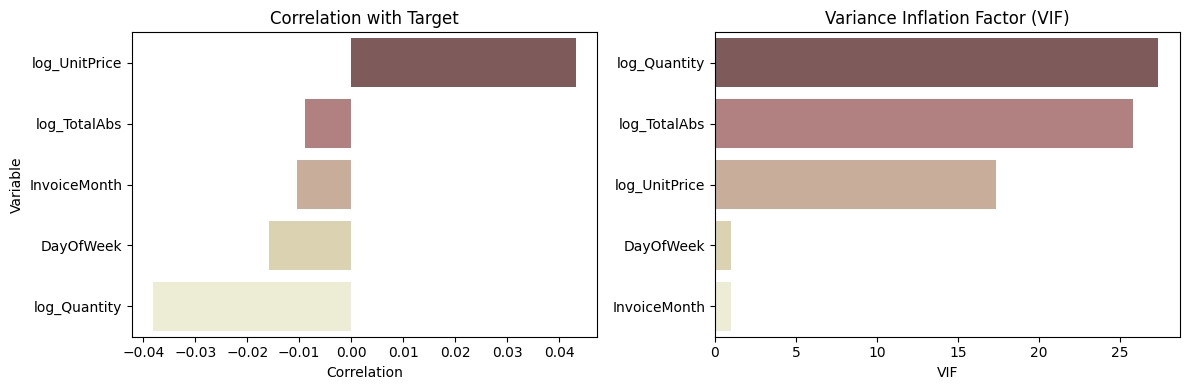


 최종 선정(퍌 <10): ['DayOfWeek', 'InvoiceMonth']


In [79]:
"""
5. 상품 정보와 거래 정보를 바탕으로 해당 거래가 반품될 가능성을 예측하는 로지스틱 회귀 모델을 만드세요.😍❤️
  😍❤️ 5_3. 모델 학습에 사용할 적절한 피쳐를 선정하세요.

"""
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

#상관계수 계산
corr_with_target = X.corrwith(y).sort_values(ascending=False)

# VIF 계산
X_const = add_constant(X)
vif = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
vif_df = pd.DataFrame({
    'Variable': X_const.columns,
    'VIF': vif
}).query("Variable != 'const'").sort_values(by='VIF', ascending=False)

corr_vif = pd.DataFrame({
    'Variable': corr_with_target.index,
    'Correlation': corr_with_target.values
}).merge(vif_df, on='Variable', how='left')

print("Correlation & VIF :")
print(corr_vif.head(10).to_string(index=False))

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.barplot(y=corr_with_target.head(10).index,
            x=corr_with_target.head(10).values,
            ax=axes[0], palette='pink')
axes[0].set_title("Correlation with Target")
axes[0].set_xlabel("Correlation")
axes[0].set_ylabel("Variable")

sns.barplot(y=vif_df['Variable'], x=vif_df['VIF'], ax=axes[1], palette='pink')
axes[1].set_title("Variance Inflation Factor (VIF)")
axes[1].set_xlabel("VIF")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

final_features = vif_df[vif_df['VIF'] < 10]['Variable'].tolist()
print("\n 최종 선정(퍌 <10):", final_features)

In [80]:
"""
5. 상품 정보와 거래 정보를 바탕으로 해당 거래가 반품될 가능성을 예측하는 로지스틱 회귀 모델을 만드세요.😍❤️
  😍❤️5_4. 모델 학습과 검증을 위해 데이터셋을 train셋과 test셋으로 나누세요.
"""
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\n학습 데이터 크기:", X_train.shape)
print("검증 데이터 크기:", X_test.shape)
print("반품 비율(Train/Test):", round(y_train.mean(),4), "/", round(y_test.mean(),4))



학습 데이터 크기: (431512, 5)
검증 데이터 크기: (107879, 5)
반품 비율(Train/Test): 0.0172 / 0.0172


In [83]:
"""
5. 상품 정보와 거래 정보를 바탕으로 해당 거래가 반품될 가능성을 예측하는 로지스틱 회귀 모델을 만드세요.😍❤️
  😍❤️5_5. IsReturn을 예측하는 로지스틱 회귀 모델을 학습하세요.
"""
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# 데이터 스케일링 (표준화)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 로지스틱 회귀 모델 학습
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr_model.fit(X_train_scaled, y_train)

print("\n학습 완료!\n")


학습 완료!



1. 모델 성능
정확도(Accuracy): 0.6261
정밀도(Precision): 0.0236
재현율(Recall): 0.5135
F1-score: 0.0452
ROC-AUC: 0.5928

 2. 상세 분류 리포트
              precision    recall  f1-score   support

           0     0.9866    0.6281    0.7675    106021
           1     0.0236    0.5135    0.0452      1858

    accuracy                         0.6261    107879
   macro avg     0.5051    0.5708    0.4064    107879
weighted avg     0.9700    0.6261    0.7551    107879



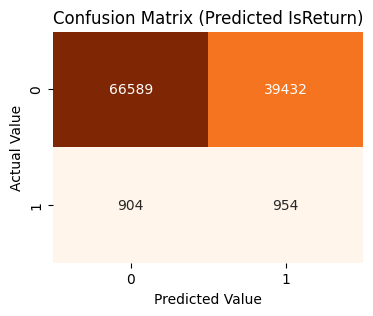

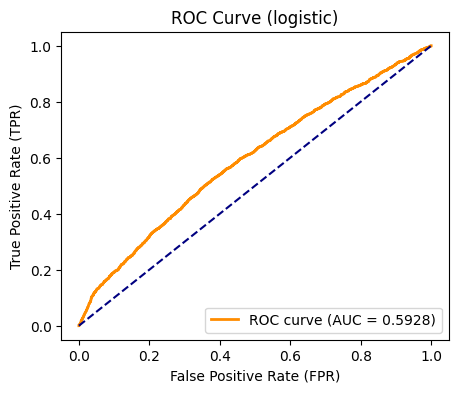

In [90]:
"""
5. 상품 정보와 거래 정보를 바탕으로 해당 거래가 반품될 가능성을 예측하는 로지스틱 회귀 모델을 만드세요.😍❤️
  😍❤️ 5_6. 혼동행렬, 정밀도, 재현율, F1-score 등 다양한 평가지표를 사용하여 모델의 성능을 평가하세요.

"""
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve
)

y_pred = lr_model.predict(X_test_scaled)
y_prob = lr_model.predict_proba(X_test_scaled)[:, 1]

# 성능 지표 계산
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print("1. 모델 성능")
print(f"정확도(Accuracy): {acc:.4f}")
print(f"정밀도(Precision): {prec:.4f}")
print(f"재현율(Recall): {rec:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {auc:.4f}")

print("\n 2. 상세 분류 리포트")
print(classification_report(y_test, y_pred, digits=4))


#  혼동행렬 시각화
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title("Confusion Matrix (Predicted IsReturn)")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.show()

# ROC 곡선 시각화
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {auc:.4f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve (logistic)")
plt.legend(loc="lower right")
plt.show()

In [91]:
"""
5. 상품 정보와 거래 정보를 바탕으로 해당 거래가 반품될 가능성을 예측하는 로지스틱 회귀 모델을 만드세요.😍❤️
  😍❤️ 5_6. 혼동행렬, 정밀도, 재현율, F1-score 등 다양한 평가지표를 사용하여 모델의 성능을 평가하세요.

결과 해석
1. 데이터 불균형 심함(정상 >>반품),
2. Accuracy = 0.6261 > 정확도 낮음
2. AUC = 0.5928 → 예측력이 중간 이하 수준, 분류 경계 모호
3. Recall = 0.5135 -> 재현력 중간값, 반품 감지율이 좋지 않음

불균형 데이터 + 로지스틱회귀모형 결과, 낮은 정확도에 예측력과 재현력이 중간정도로 적합하지 않음
--> 데이터 정제 또는 모델 변경으로 모델 성능을 높일 필요가 있음.
"""

'\n5. 상품 정보와 거래 정보를 바탕으로 해당 거래가 반품될 가능성을 예측하는 로지스틱 회귀 모델을 만드세요.😍❤️\n  😍❤️ 5_6. 혼동행렬, 정밀도, 재현율, F1-score 등 다양한 평가지표를 사용하여 모델의 성능을 평가하세요.\n\n결과 해석\n1. 데이터 불균형 심함(정상 >>반품),\n2. Accuracy = 0.6261 > 정확도 낮음\n2. AUC = 0.5928 → 예측력이 중간 이하 수준, 분류 경계 모호\n3. Recall = 0.5135 -> 재현력 중간값, 반품 감지율이 좋지 않음\n\n불균형 데이터 + 로지스틱회귀모형 결과, 낮은 정확도에 예측력과 재현력이 중간정도로 적합하지 않음\n--> 데이터 정제 또는 모델 변경으로 모델 성능을 높일 필요가 있음.\n'

SMOTE 적용 후 데이터 크기: (848164, 5) 양성비율: 0.5
최적 파라미터: {'C': 0.01, 'penalty': 'l1'}
최적 임계값(threshold): 0.6636

 1. 개선 모델 성능]
정확도(Accuracy): 0.9432
정밀도(Precision): 0.0456
재현율(Recall): 0.1152
F1-score: 0.0653
ROC-AUC: 0.5930


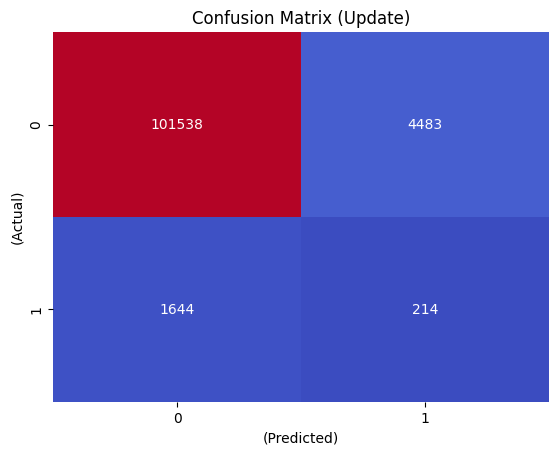

In [92]:
"""
5. 상품 정보와 거래 정보를 바탕으로 해당 거래가 반품될 가능성을 예측하는 로지스틱 회귀 모델을 만드세요.😍❤️
  😍❤️ 5_7. 모델의 성능을 더 높일 수 있는 방안에 대해서 고민해보세요.

  SMOTE : SMOTE나 클래스 가중치 조정으로 데이터 불균형을 완화하여 F1-score와 AUC 개선
  참고 : chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://arxiv.org/pdf/1106.1813

"""

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve

# 1. 데이터 균형화 (SMOTE)
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_scaled, y_train)
print("SMOTE 적용 후 데이터 크기:", X_res.shape, "양성비율:", y_res.mean().round(3))

# 2. 로지스틱 회귀 모델 + 하이퍼파라미터 탐색
param_grid = {
    'C': [0.01, 0.1, 1.0, 5.0],
    'penalty': ['l1', 'l2']
}
grid = GridSearchCV(LogisticRegression(max_iter=2000, solver='liblinear'),
                    param_grid, scoring='f1', cv=5, n_jobs=-1)
grid.fit(X_res, y_res)
best_model = grid.best_estimator_

print("최적 파라미터:", grid.best_params_)

# 3. 테스트셋 예측
y_prob_new = best_model.predict_proba(X_test_scaled)[:, 1]

# F1이 가장 높아지는 임계값 찾기
prec, rec, thr = precision_recall_curve(y_test, y_prob_new)
f1s = 2 * (prec * rec) / (prec + rec + 1e-12)
best_thr = thr[np.argmax(f1s)]
print(f"최적 임계값(threshold): {best_thr:.4f}")

y_pred_new = (y_prob_new >= best_thr).astype(int)

# 4. 개선된 성능 평가
acc_new = accuracy_score(y_test, y_pred_new)
prec_new = precision_score(y_test, y_pred_new)
rec_new = recall_score(y_test, y_pred_new)
f1_new = f1_score(y_test, y_pred_new)
auc_new = roc_auc_score(y_test, y_prob_new)

print("\n 1. 개선 모델 성능]")
print(f"정확도(Accuracy): {acc_new:.4f}")
print(f"정밀도(Precision): {prec_new:.4f}")
print(f"재현율(Recall): {rec_new:.4f}")
print(f"F1-score: {f1_new:.4f}")
print(f"ROC-AUC: {auc_new:.4f}")

# 혼동행렬
cm2 = confusion_matrix(y_test, y_pred_new)
sns.heatmap(cm2, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.title("Confusion Matrix (Update)")
plt.xlabel("(Predicted)")
plt.ylabel("(Actual)")
plt.show()


In [ ]:
"""
5. 상품 정보와 거래 정보를 바탕으로 해당 거래가 반품될 가능성을 예측하는 로지스틱 회귀 모델을 만드세요.😍❤️
  😍❤️ 5_7. 모델의 성능을 더 높일 수 있는 방안에 대해서 고민해보세요.

SMOTE적용 결과, 모델 성능 중 정확도 올라감.

정확도(Accuracy): 0.9432
정밀도(Precision): 0.0456
재현율(Recall): 0.1152
F1-score: 0.0653
ROC-AUC: 0.5930

"""